In [140]:
import pandas as pd
import pandas_datareader
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [141]:
names = ['date',"mo", "weekd", 'time','partday','open','high','low','close','vol']
data = pd.read_csv("5min201718.csv",delimiter=";",names=names, skiprows=1)


In [142]:
data.head()

,date,mo,weekd,time,partday,open,high,low,close,vol
0,01.03.2017,3.0,3.0,10:05,1.0,58.4100,58.4100,58.295,58.3725,74555000
1,01.03.2017,3.0,3.0,10:10,1.0,58.3700,58.4475,58.360,58.4300,95716000
2,01.03.2017,3.0,3.0,10:15,1.0,58.4350,58.5275,58.430,58.4600,95539000
3,01.03.2017,3.0,3.0,10:20,1.0,58.4675,58.4725,58.380,58.4000,48097000
4,01.03.2017,3.0,3.0,10:25,1.0,58.4025,58.4150,58.360,58.4075,26548000


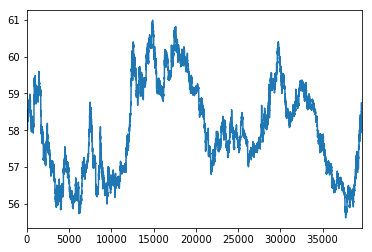

In [143]:
data.close.plot()

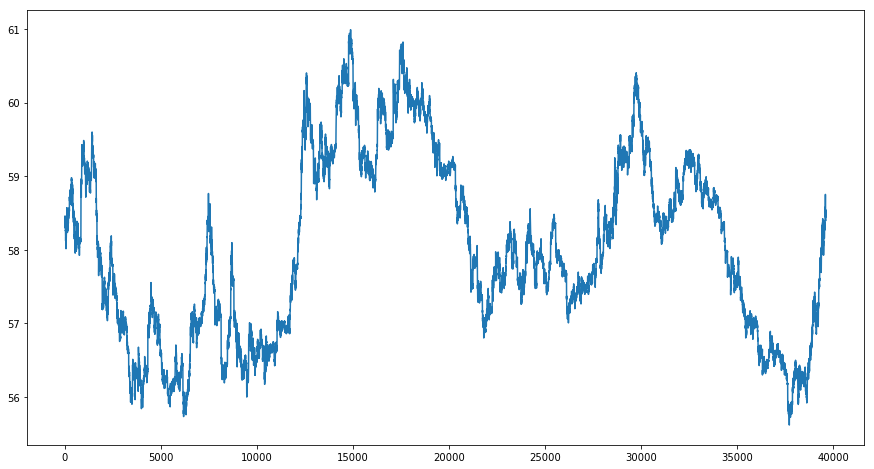

In [144]:
plt.figure(figsize=(15,8))
plt.plot(data.close)

In [145]:
data.describe()

,mo,weekd,partday,open,high,low,close,vol
count,39624.000000,39624.000000,39624.00000,39624.000000,39624.000000,39624.000000,39624.000000,3.962400e+04
mean,6.816071,3.071648,2.28826,58.014437,58.032366,57.996309,58.014463,1.964519e+07
std,3.350393,1.398796,0.69472,1.226442,1.227504,1.225460,1.226346,2.525736e+07
min,1.000000,1.000000,1.00000,55.630000,55.672500,55.585000,55.620000,7.400000e+01
25%,4.000000,2.000000,2.00000,56.995000,57.012500,56.980000,56.995000,2.889750e+06
50%,7.000000,3.000000,2.00000,57.882500,57.900000,57.865000,57.880000,1.223850e+07
75%,10.000000,4.000000,3.00000,59.070000,59.085000,59.050000,59.070000,2.632600e+07
max,12.000000,5.000000,3.00000,60.990000,60.990000,60.960000,60.990000,3.891370e+08


In [146]:
data['move'] = data.close-data.open
data['change'] = (data.close / data.open)-1

In [147]:
data.head()

,date,mo,weekd,time,partday,open,high,low,close,vol,move,change
0,01.03.2017,3.0,3.0,10:05,1.0,58.4100,58.4100,58.295,58.3725,74555000,-0.0375,-0.000642
1,01.03.2017,3.0,3.0,10:10,1.0,58.3700,58.4475,58.360,58.4300,95716000,0.0600,0.001028
2,01.03.2017,3.0,3.0,10:15,1.0,58.4350,58.5275,58.430,58.4600,95539000,0.0250,0.000428
3,01.03.2017,3.0,3.0,10:20,1.0,58.4675,58.4725,58.380,58.4000,48097000,-0.0675,-0.001154
4,01.03.2017,3.0,3.0,10:25,1.0,58.4025,58.4150,58.360,58.4075,26548000,0.0050,0.000086


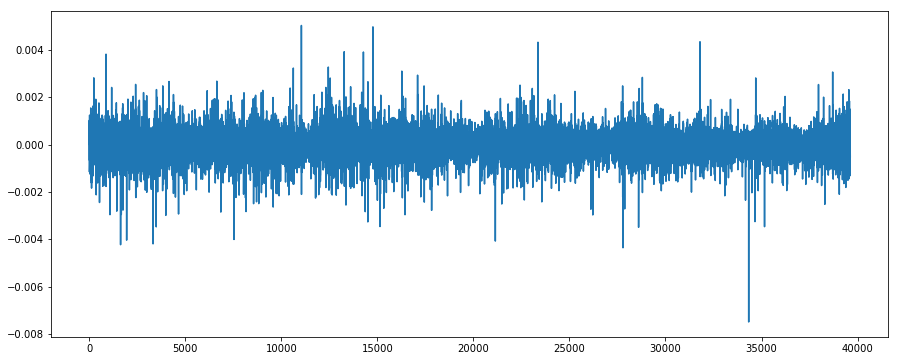

In [148]:
plt.figure(figsize=(15,6))
plt.plot( data.change)


In [149]:
data.isnull().sum()


date       0
mo         0
weekd      0
time       0
partday    0
open       0
high       0
low        0
close      0
vol        0
move       0
change     0
dtype: int64

Ideas:
--
predict
-  consecutive upward candle sticks
-  change of x%
-  convolution of different params into 1 layer


In [204]:
thresh = 0.06
# data['y'] = ((data['move'].shift(-1)<-thresh).astype(int) * 1 + 2 * (data['move'].shift(-1)>thresh).astype(int) + 0)
data['y'] = (1 * (data['move'].shift(-1)>thresh).astype(int) + 0)
# 
data.head(50)

,date,mo,weekd,time,partday,open,high,low,close,vol,move,change,y
0,01.03.2017,3.0,3.0,10:05,1.0,58.4100,58.4100,58.2950,58.3725,74555000,-0.0375,-0.000642,1
1,01.03.2017,3.0,3.0,10:10,1.0,58.3700,58.4475,58.3600,58.4300,95716000,0.0600,0.001028,0
2,01.03.2017,3.0,3.0,10:15,1.0,58.4350,58.5275,58.4300,58.4600,95539000,0.0250,0.000428,0
3,01.03.2017,3.0,3.0,10:20,1.0,58.4675,58.4725,58.3800,58.4000,48097000,-0.0675,-0.001154,0
4,01.03.2017,3.0,3.0,10:25,1.0,58.4025,58.4150,58.3600,58.4075,26548000,0.0050,0.000086,0
5,01.03.2017,3.0,3.0,10:30,1.0,58.4100,58.4300,58.3725,58.3900,14076000,-0.0200,-0.000342,0
6,01.03.2017,3.0,3.0,10:35,1.0,58.3900,58.4525,58.3850,58.4225,11777000,0.0325,0.000557,0
7,01.03.2017,3.0,3.0,10:40,1.0,58.4275,58.4400,58.3875,58.3875,10107000,-0.0400,-0.000685,0
8,01.03.2017,3.0,3.0,10:45,1.0,58.3825,58.3900,58.3175,58.3575,35623000,-0.0250,-0.000428,0
9,01.03.2017,3.0,3.0,10:50,1.0,58.3500,58.3850,58.2825,58.3000,65355000,-0.0500,-0.000857,0


In [151]:
data.y.sum()

2269

In [152]:
data.shape

(39624, 13)

In [153]:
# close = np.array((np.array(data.close)-np.mean(data.close))/np.std(data.close))

In [160]:
close = np.array(data.close)
close.shape

(39624,)

In [212]:
label = np.array(data.y)
label.shape

(39624,)

In [169]:
X[1]

array([ 58.3725,  58.43  ,  58.46  ,  58.4   ,  58.4075,  58.39  ,
        58.4225,  58.3875,  58.3575,  58.3   ,  58.3025,  58.3   ,
        58.3725,  58.36  ,  58.34  ,  58.34  ,  58.335 ,  58.36  ,
        58.325 ,  58.3275,  58.3225,  58.285 ,  58.2725,  58.265 ,
        58.2575,  58.26  ,  58.2675,  58.22  ,  58.215 ,  58.24  ])

In [170]:
rolling_number = 30
X = np.zeros((1,rolling_number))

f=0
new_block = np.arange(1)
for i in range(close.shape[0]):
    if i>=30:
        new_block = np.resize(np.array(close[i-30:i]),(1,rolling_number))
        X = np.append(X, new_block,axis=0)
#         print(new_block.shape,f)
#         np.add(X[i],new_block)

    f+=1
    print(new_block.shape, X.shape, i)
    



(1,) (1, 30) 0
(1,) (1, 30) 1
(1,) (1, 30) 2
(1,) (1, 30) 3
(1,) (1, 30) 4
(1,) (1, 30) 5
(1,) (1, 30) 6
(1,) (1, 30) 7
(1,) (1, 30) 8
(1,) (1, 30) 9
(1,) (1, 30) 10
(1,) (1, 30) 11
(1,) (1, 30) 12
(1,) (1, 30) 13
(1,) (1, 30) 14
(1,) (1, 30) 15
(1,) (1, 30) 16
(1,) (1, 30) 17
(1,) (1, 30) 18
(1,) (1, 30) 19
(1,) (1, 30) 20
(1,) (1, 30) 21
(1,) (1, 30) 22
(1,) (1, 30) 23
(1,) (1, 30) 24
(1,) (1, 30) 25
(1,) (1, 30) 26
(1,) (1, 30) 27
(1,) (1, 30) 28
(1,) (1, 30) 29
(1, 30) (2, 30) 30
(1, 30) (3, 30) 31
(1, 30) (4, 30) 32
(1, 30) (5, 30) 33
(1, 30) (6, 30) 34
(1, 30) (7, 30) 35
(1, 30) (8, 30) 36
(1, 30) (9, 30) 37
(1, 30) (10, 30) 38
(1, 30) (11, 30) 39
(1, 30) (12, 30) 40
(1, 30) (13, 30) 41
(1, 30) (14, 30) 42
(1, 30) (15, 30) 43
(1, 30) (16, 30) 44
(1, 30) (17, 30) 45
(1, 30) (18, 30) 46
(1, 30) (19, 30) 47
(1, 30) (20, 30) 48
(1, 30) (21, 30) 49
(1, 30) (22, 30) 50
(1, 30) (23, 30) 51
(1, 30) (24, 30) 52
(1, 30) (25, 30) 53
(1, 30) (26, 30) 54
(1, 30) (27, 30) 55
(1, 30) (28, 30) 5

(1, 30) (766, 30) 794
(1, 30) (767, 30) 795
(1, 30) (768, 30) 796
(1, 30) (769, 30) 797
(1, 30) (770, 30) 798
(1, 30) (771, 30) 799
(1, 30) (772, 30) 800
(1, 30) (773, 30) 801
(1, 30) (774, 30) 802
(1, 30) (775, 30) 803
(1, 30) (776, 30) 804
(1, 30) (777, 30) 805
(1, 30) (778, 30) 806
(1, 30) (779, 30) 807
(1, 30) (780, 30) 808
(1, 30) (781, 30) 809
(1, 30) (782, 30) 810
(1, 30) (783, 30) 811
(1, 30) (784, 30) 812
(1, 30) (785, 30) 813
(1, 30) (786, 30) 814
(1, 30) (787, 30) 815
(1, 30) (788, 30) 816
(1, 30) (789, 30) 817
(1, 30) (790, 30) 818
(1, 30) (791, 30) 819
(1, 30) (792, 30) 820
(1, 30) (793, 30) 821
(1, 30) (794, 30) 822
(1, 30) (795, 30) 823
(1, 30) (796, 30) 824
(1, 30) (797, 30) 825
(1, 30) (798, 30) 826
(1, 30) (799, 30) 827
(1, 30) (800, 30) 828
(1, 30) (801, 30) 829
(1, 30) (802, 30) 830
(1, 30) (803, 30) 831
(1, 30) (804, 30) 832
(1, 30) (805, 30) 833
(1, 30) (806, 30) 834
(1, 30) (807, 30) 835
(1, 30) (808, 30) 836
(1, 30) (809, 30) 837
(1, 30) (810, 30) 838
(1, 30) (8

(1, 30) (1195, 30) 1223
(1, 30) (1196, 30) 1224
(1, 30) (1197, 30) 1225
(1, 30) (1198, 30) 1226
(1, 30) (1199, 30) 1227
(1, 30) (1200, 30) 1228
(1, 30) (1201, 30) 1229
(1, 30) (1202, 30) 1230
(1, 30) (1203, 30) 1231
(1, 30) (1204, 30) 1232
(1, 30) (1205, 30) 1233
(1, 30) (1206, 30) 1234
(1, 30) (1207, 30) 1235
(1, 30) (1208, 30) 1236
(1, 30) (1209, 30) 1237
(1, 30) (1210, 30) 1238
(1, 30) (1211, 30) 1239
(1, 30) (1212, 30) 1240
(1, 30) (1213, 30) 1241
(1, 30) (1214, 30) 1242
(1, 30) (1215, 30) 1243
(1, 30) (1216, 30) 1244
(1, 30) (1217, 30) 1245
(1, 30) (1218, 30) 1246
(1, 30) (1219, 30) 1247
(1, 30) (1220, 30) 1248
(1, 30) (1221, 30) 1249
(1, 30) (1222, 30) 1250
(1, 30) (1223, 30) 1251
(1, 30) (1224, 30) 1252
(1, 30) (1225, 30) 1253
(1, 30) (1226, 30) 1254
(1, 30) (1227, 30) 1255
(1, 30) (1228, 30) 1256
(1, 30) (1229, 30) 1257
(1, 30) (1230, 30) 1258
(1, 30) (1231, 30) 1259
(1, 30) (1232, 30) 1260
(1, 30) (1233, 30) 1261
(1, 30) (1234, 30) 1262
(1, 30) (1235, 30) 1263
(1, 30) (1236, 3

(1, 30) (1753, 30) 1781
(1, 30) (1754, 30) 1782
(1, 30) (1755, 30) 1783
(1, 30) (1756, 30) 1784
(1, 30) (1757, 30) 1785
(1, 30) (1758, 30) 1786
(1, 30) (1759, 30) 1787
(1, 30) (1760, 30) 1788
(1, 30) (1761, 30) 1789
(1, 30) (1762, 30) 1790
(1, 30) (1763, 30) 1791
(1, 30) (1764, 30) 1792
(1, 30) (1765, 30) 1793
(1, 30) (1766, 30) 1794
(1, 30) (1767, 30) 1795
(1, 30) (1768, 30) 1796
(1, 30) (1769, 30) 1797
(1, 30) (1770, 30) 1798
(1, 30) (1771, 30) 1799
(1, 30) (1772, 30) 1800
(1, 30) (1773, 30) 1801
(1, 30) (1774, 30) 1802
(1, 30) (1775, 30) 1803
(1, 30) (1776, 30) 1804
(1, 30) (1777, 30) 1805
(1, 30) (1778, 30) 1806
(1, 30) (1779, 30) 1807
(1, 30) (1780, 30) 1808
(1, 30) (1781, 30) 1809
(1, 30) (1782, 30) 1810
(1, 30) (1783, 30) 1811
(1, 30) (1784, 30) 1812
(1, 30) (1785, 30) 1813
(1, 30) (1786, 30) 1814
(1, 30) (1787, 30) 1815
(1, 30) (1788, 30) 1816
(1, 30) (1789, 30) 1817
(1, 30) (1790, 30) 1818
(1, 30) (1791, 30) 1819
(1, 30) (1792, 30) 1820
(1, 30) (1793, 30) 1821
(1, 30) (1794, 3

(1, 30) (2319, 30) 2347
(1, 30) (2320, 30) 2348
(1, 30) (2321, 30) 2349
(1, 30) (2322, 30) 2350
(1, 30) (2323, 30) 2351
(1, 30) (2324, 30) 2352
(1, 30) (2325, 30) 2353
(1, 30) (2326, 30) 2354
(1, 30) (2327, 30) 2355
(1, 30) (2328, 30) 2356
(1, 30) (2329, 30) 2357
(1, 30) (2330, 30) 2358
(1, 30) (2331, 30) 2359
(1, 30) (2332, 30) 2360
(1, 30) (2333, 30) 2361
(1, 30) (2334, 30) 2362
(1, 30) (2335, 30) 2363
(1, 30) (2336, 30) 2364
(1, 30) (2337, 30) 2365
(1, 30) (2338, 30) 2366
(1, 30) (2339, 30) 2367
(1, 30) (2340, 30) 2368
(1, 30) (2341, 30) 2369
(1, 30) (2342, 30) 2370
(1, 30) (2343, 30) 2371
(1, 30) (2344, 30) 2372
(1, 30) (2345, 30) 2373
(1, 30) (2346, 30) 2374
(1, 30) (2347, 30) 2375
(1, 30) (2348, 30) 2376
(1, 30) (2349, 30) 2377
(1, 30) (2350, 30) 2378
(1, 30) (2351, 30) 2379
(1, 30) (2352, 30) 2380
(1, 30) (2353, 30) 2381
(1, 30) (2354, 30) 2382
(1, 30) (2355, 30) 2383
(1, 30) (2356, 30) 2384
(1, 30) (2357, 30) 2385
(1, 30) (2358, 30) 2386
(1, 30) (2359, 30) 2387
(1, 30) (2360, 3

(1, 30) (2842, 30) 2870
(1, 30) (2843, 30) 2871
(1, 30) (2844, 30) 2872
(1, 30) (2845, 30) 2873
(1, 30) (2846, 30) 2874
(1, 30) (2847, 30) 2875
(1, 30) (2848, 30) 2876
(1, 30) (2849, 30) 2877
(1, 30) (2850, 30) 2878
(1, 30) (2851, 30) 2879
(1, 30) (2852, 30) 2880
(1, 30) (2853, 30) 2881
(1, 30) (2854, 30) 2882
(1, 30) (2855, 30) 2883
(1, 30) (2856, 30) 2884
(1, 30) (2857, 30) 2885
(1, 30) (2858, 30) 2886
(1, 30) (2859, 30) 2887
(1, 30) (2860, 30) 2888
(1, 30) (2861, 30) 2889
(1, 30) (2862, 30) 2890
(1, 30) (2863, 30) 2891
(1, 30) (2864, 30) 2892
(1, 30) (2865, 30) 2893
(1, 30) (2866, 30) 2894
(1, 30) (2867, 30) 2895
(1, 30) (2868, 30) 2896
(1, 30) (2869, 30) 2897
(1, 30) (2870, 30) 2898
(1, 30) (2871, 30) 2899
(1, 30) (2872, 30) 2900
(1, 30) (2873, 30) 2901
(1, 30) (2874, 30) 2902
(1, 30) (2875, 30) 2903
(1, 30) (2876, 30) 2904
(1, 30) (2877, 30) 2905
(1, 30) (2878, 30) 2906
(1, 30) (2879, 30) 2907
(1, 30) (2880, 30) 2908
(1, 30) (2881, 30) 2909
(1, 30) (2882, 30) 2910
(1, 30) (2883, 3

(1, 30) (3370, 30) 3398
(1, 30) (3371, 30) 3399
(1, 30) (3372, 30) 3400
(1, 30) (3373, 30) 3401
(1, 30) (3374, 30) 3402
(1, 30) (3375, 30) 3403
(1, 30) (3376, 30) 3404
(1, 30) (3377, 30) 3405
(1, 30) (3378, 30) 3406
(1, 30) (3379, 30) 3407
(1, 30) (3380, 30) 3408
(1, 30) (3381, 30) 3409
(1, 30) (3382, 30) 3410
(1, 30) (3383, 30) 3411
(1, 30) (3384, 30) 3412
(1, 30) (3385, 30) 3413
(1, 30) (3386, 30) 3414
(1, 30) (3387, 30) 3415
(1, 30) (3388, 30) 3416
(1, 30) (3389, 30) 3417
(1, 30) (3390, 30) 3418
(1, 30) (3391, 30) 3419
(1, 30) (3392, 30) 3420
(1, 30) (3393, 30) 3421
(1, 30) (3394, 30) 3422
(1, 30) (3395, 30) 3423
(1, 30) (3396, 30) 3424
(1, 30) (3397, 30) 3425
(1, 30) (3398, 30) 3426
(1, 30) (3399, 30) 3427
(1, 30) (3400, 30) 3428
(1, 30) (3401, 30) 3429
(1, 30) (3402, 30) 3430
(1, 30) (3403, 30) 3431
(1, 30) (3404, 30) 3432
(1, 30) (3405, 30) 3433
(1, 30) (3406, 30) 3434
(1, 30) (3407, 30) 3435
(1, 30) (3408, 30) 3436
(1, 30) (3409, 30) 3437
(1, 30) (3410, 30) 3438
(1, 30) (3411, 3

(1, 30) (3873, 30) 3901
(1, 30) (3874, 30) 3902
(1, 30) (3875, 30) 3903
(1, 30) (3876, 30) 3904
(1, 30) (3877, 30) 3905
(1, 30) (3878, 30) 3906
(1, 30) (3879, 30) 3907
(1, 30) (3880, 30) 3908
(1, 30) (3881, 30) 3909
(1, 30) (3882, 30) 3910
(1, 30) (3883, 30) 3911
(1, 30) (3884, 30) 3912
(1, 30) (3885, 30) 3913
(1, 30) (3886, 30) 3914
(1, 30) (3887, 30) 3915
(1, 30) (3888, 30) 3916
(1, 30) (3889, 30) 3917
(1, 30) (3890, 30) 3918
(1, 30) (3891, 30) 3919
(1, 30) (3892, 30) 3920
(1, 30) (3893, 30) 3921
(1, 30) (3894, 30) 3922
(1, 30) (3895, 30) 3923
(1, 30) (3896, 30) 3924
(1, 30) (3897, 30) 3925
(1, 30) (3898, 30) 3926
(1, 30) (3899, 30) 3927
(1, 30) (3900, 30) 3928
(1, 30) (3901, 30) 3929
(1, 30) (3902, 30) 3930
(1, 30) (3903, 30) 3931
(1, 30) (3904, 30) 3932
(1, 30) (3905, 30) 3933
(1, 30) (3906, 30) 3934
(1, 30) (3907, 30) 3935
(1, 30) (3908, 30) 3936
(1, 30) (3909, 30) 3937
(1, 30) (3910, 30) 3938
(1, 30) (3911, 30) 3939
(1, 30) (3912, 30) 3940
(1, 30) (3913, 30) 3941
(1, 30) (3914, 3

(1, 30) (4357, 30) 4385
(1, 30) (4358, 30) 4386
(1, 30) (4359, 30) 4387
(1, 30) (4360, 30) 4388
(1, 30) (4361, 30) 4389
(1, 30) (4362, 30) 4390
(1, 30) (4363, 30) 4391
(1, 30) (4364, 30) 4392
(1, 30) (4365, 30) 4393
(1, 30) (4366, 30) 4394
(1, 30) (4367, 30) 4395
(1, 30) (4368, 30) 4396
(1, 30) (4369, 30) 4397
(1, 30) (4370, 30) 4398
(1, 30) (4371, 30) 4399
(1, 30) (4372, 30) 4400
(1, 30) (4373, 30) 4401
(1, 30) (4374, 30) 4402
(1, 30) (4375, 30) 4403
(1, 30) (4376, 30) 4404
(1, 30) (4377, 30) 4405
(1, 30) (4378, 30) 4406
(1, 30) (4379, 30) 4407
(1, 30) (4380, 30) 4408
(1, 30) (4381, 30) 4409
(1, 30) (4382, 30) 4410
(1, 30) (4383, 30) 4411
(1, 30) (4384, 30) 4412
(1, 30) (4385, 30) 4413
(1, 30) (4386, 30) 4414
(1, 30) (4387, 30) 4415
(1, 30) (4388, 30) 4416
(1, 30) (4389, 30) 4417
(1, 30) (4390, 30) 4418
(1, 30) (4391, 30) 4419
(1, 30) (4392, 30) 4420
(1, 30) (4393, 30) 4421
(1, 30) (4394, 30) 4422
(1, 30) (4395, 30) 4423
(1, 30) (4396, 30) 4424
(1, 30) (4397, 30) 4425
(1, 30) (4398, 3

(1, 30) (4987, 30) 5015
(1, 30) (4988, 30) 5016
(1, 30) (4989, 30) 5017
(1, 30) (4990, 30) 5018
(1, 30) (4991, 30) 5019
(1, 30) (4992, 30) 5020
(1, 30) (4993, 30) 5021
(1, 30) (4994, 30) 5022
(1, 30) (4995, 30) 5023
(1, 30) (4996, 30) 5024
(1, 30) (4997, 30) 5025
(1, 30) (4998, 30) 5026
(1, 30) (4999, 30) 5027
(1, 30) (5000, 30) 5028
(1, 30) (5001, 30) 5029
(1, 30) (5002, 30) 5030
(1, 30) (5003, 30) 5031
(1, 30) (5004, 30) 5032
(1, 30) (5005, 30) 5033
(1, 30) (5006, 30) 5034
(1, 30) (5007, 30) 5035
(1, 30) (5008, 30) 5036
(1, 30) (5009, 30) 5037
(1, 30) (5010, 30) 5038
(1, 30) (5011, 30) 5039
(1, 30) (5012, 30) 5040
(1, 30) (5013, 30) 5041
(1, 30) (5014, 30) 5042
(1, 30) (5015, 30) 5043
(1, 30) (5016, 30) 5044
(1, 30) (5017, 30) 5045
(1, 30) (5018, 30) 5046
(1, 30) (5019, 30) 5047
(1, 30) (5020, 30) 5048
(1, 30) (5021, 30) 5049
(1, 30) (5022, 30) 5050
(1, 30) (5023, 30) 5051
(1, 30) (5024, 30) 5052
(1, 30) (5025, 30) 5053
(1, 30) (5026, 30) 5054
(1, 30) (5027, 30) 5055
(1, 30) (5028, 3

(1, 30) (5486, 30) 5514
(1, 30) (5487, 30) 5515
(1, 30) (5488, 30) 5516
(1, 30) (5489, 30) 5517
(1, 30) (5490, 30) 5518
(1, 30) (5491, 30) 5519
(1, 30) (5492, 30) 5520
(1, 30) (5493, 30) 5521
(1, 30) (5494, 30) 5522
(1, 30) (5495, 30) 5523
(1, 30) (5496, 30) 5524
(1, 30) (5497, 30) 5525
(1, 30) (5498, 30) 5526
(1, 30) (5499, 30) 5527
(1, 30) (5500, 30) 5528
(1, 30) (5501, 30) 5529
(1, 30) (5502, 30) 5530
(1, 30) (5503, 30) 5531
(1, 30) (5504, 30) 5532
(1, 30) (5505, 30) 5533
(1, 30) (5506, 30) 5534
(1, 30) (5507, 30) 5535
(1, 30) (5508, 30) 5536
(1, 30) (5509, 30) 5537
(1, 30) (5510, 30) 5538
(1, 30) (5511, 30) 5539
(1, 30) (5512, 30) 5540
(1, 30) (5513, 30) 5541
(1, 30) (5514, 30) 5542
(1, 30) (5515, 30) 5543
(1, 30) (5516, 30) 5544
(1, 30) (5517, 30) 5545
(1, 30) (5518, 30) 5546
(1, 30) (5519, 30) 5547
(1, 30) (5520, 30) 5548
(1, 30) (5521, 30) 5549
(1, 30) (5522, 30) 5550
(1, 30) (5523, 30) 5551
(1, 30) (5524, 30) 5552
(1, 30) (5525, 30) 5553
(1, 30) (5526, 30) 5554
(1, 30) (5527, 3

(1, 30) (5907, 30) 5935
(1, 30) (5908, 30) 5936
(1, 30) (5909, 30) 5937
(1, 30) (5910, 30) 5938
(1, 30) (5911, 30) 5939
(1, 30) (5912, 30) 5940
(1, 30) (5913, 30) 5941
(1, 30) (5914, 30) 5942
(1, 30) (5915, 30) 5943
(1, 30) (5916, 30) 5944
(1, 30) (5917, 30) 5945
(1, 30) (5918, 30) 5946
(1, 30) (5919, 30) 5947
(1, 30) (5920, 30) 5948
(1, 30) (5921, 30) 5949
(1, 30) (5922, 30) 5950
(1, 30) (5923, 30) 5951
(1, 30) (5924, 30) 5952
(1, 30) (5925, 30) 5953
(1, 30) (5926, 30) 5954
(1, 30) (5927, 30) 5955
(1, 30) (5928, 30) 5956
(1, 30) (5929, 30) 5957
(1, 30) (5930, 30) 5958
(1, 30) (5931, 30) 5959
(1, 30) (5932, 30) 5960
(1, 30) (5933, 30) 5961
(1, 30) (5934, 30) 5962
(1, 30) (5935, 30) 5963
(1, 30) (5936, 30) 5964
(1, 30) (5937, 30) 5965
(1, 30) (5938, 30) 5966
(1, 30) (5939, 30) 5967
(1, 30) (5940, 30) 5968
(1, 30) (5941, 30) 5969
(1, 30) (5942, 30) 5970
(1, 30) (5943, 30) 5971
(1, 30) (5944, 30) 5972
(1, 30) (5945, 30) 5973
(1, 30) (5946, 30) 5974
(1, 30) (5947, 30) 5975
(1, 30) (5948, 3

(1, 30) (6279, 30) 6307
(1, 30) (6280, 30) 6308
(1, 30) (6281, 30) 6309
(1, 30) (6282, 30) 6310
(1, 30) (6283, 30) 6311
(1, 30) (6284, 30) 6312
(1, 30) (6285, 30) 6313
(1, 30) (6286, 30) 6314
(1, 30) (6287, 30) 6315
(1, 30) (6288, 30) 6316
(1, 30) (6289, 30) 6317
(1, 30) (6290, 30) 6318
(1, 30) (6291, 30) 6319
(1, 30) (6292, 30) 6320
(1, 30) (6293, 30) 6321
(1, 30) (6294, 30) 6322
(1, 30) (6295, 30) 6323
(1, 30) (6296, 30) 6324
(1, 30) (6297, 30) 6325
(1, 30) (6298, 30) 6326
(1, 30) (6299, 30) 6327
(1, 30) (6300, 30) 6328
(1, 30) (6301, 30) 6329
(1, 30) (6302, 30) 6330
(1, 30) (6303, 30) 6331
(1, 30) (6304, 30) 6332
(1, 30) (6305, 30) 6333
(1, 30) (6306, 30) 6334
(1, 30) (6307, 30) 6335
(1, 30) (6308, 30) 6336
(1, 30) (6309, 30) 6337
(1, 30) (6310, 30) 6338
(1, 30) (6311, 30) 6339
(1, 30) (6312, 30) 6340
(1, 30) (6313, 30) 6341
(1, 30) (6314, 30) 6342
(1, 30) (6315, 30) 6343
(1, 30) (6316, 30) 6344
(1, 30) (6317, 30) 6345
(1, 30) (6318, 30) 6346
(1, 30) (6319, 30) 6347
(1, 30) (6320, 3

(1, 30) (6699, 30) 6727
(1, 30) (6700, 30) 6728
(1, 30) (6701, 30) 6729
(1, 30) (6702, 30) 6730
(1, 30) (6703, 30) 6731
(1, 30) (6704, 30) 6732
(1, 30) (6705, 30) 6733
(1, 30) (6706, 30) 6734
(1, 30) (6707, 30) 6735
(1, 30) (6708, 30) 6736
(1, 30) (6709, 30) 6737
(1, 30) (6710, 30) 6738
(1, 30) (6711, 30) 6739
(1, 30) (6712, 30) 6740
(1, 30) (6713, 30) 6741
(1, 30) (6714, 30) 6742
(1, 30) (6715, 30) 6743
(1, 30) (6716, 30) 6744
(1, 30) (6717, 30) 6745
(1, 30) (6718, 30) 6746
(1, 30) (6719, 30) 6747
(1, 30) (6720, 30) 6748
(1, 30) (6721, 30) 6749
(1, 30) (6722, 30) 6750
(1, 30) (6723, 30) 6751
(1, 30) (6724, 30) 6752
(1, 30) (6725, 30) 6753
(1, 30) (6726, 30) 6754
(1, 30) (6727, 30) 6755
(1, 30) (6728, 30) 6756
(1, 30) (6729, 30) 6757
(1, 30) (6730, 30) 6758
(1, 30) (6731, 30) 6759
(1, 30) (6732, 30) 6760
(1, 30) (6733, 30) 6761
(1, 30) (6734, 30) 6762
(1, 30) (6735, 30) 6763
(1, 30) (6736, 30) 6764
(1, 30) (6737, 30) 6765
(1, 30) (6738, 30) 6766
(1, 30) (6739, 30) 6767
(1, 30) (6740, 3

(1, 30) (7060, 30) 7088
(1, 30) (7061, 30) 7089
(1, 30) (7062, 30) 7090
(1, 30) (7063, 30) 7091
(1, 30) (7064, 30) 7092
(1, 30) (7065, 30) 7093
(1, 30) (7066, 30) 7094
(1, 30) (7067, 30) 7095
(1, 30) (7068, 30) 7096
(1, 30) (7069, 30) 7097
(1, 30) (7070, 30) 7098
(1, 30) (7071, 30) 7099
(1, 30) (7072, 30) 7100
(1, 30) (7073, 30) 7101
(1, 30) (7074, 30) 7102
(1, 30) (7075, 30) 7103
(1, 30) (7076, 30) 7104
(1, 30) (7077, 30) 7105
(1, 30) (7078, 30) 7106
(1, 30) (7079, 30) 7107
(1, 30) (7080, 30) 7108
(1, 30) (7081, 30) 7109
(1, 30) (7082, 30) 7110
(1, 30) (7083, 30) 7111
(1, 30) (7084, 30) 7112
(1, 30) (7085, 30) 7113
(1, 30) (7086, 30) 7114
(1, 30) (7087, 30) 7115
(1, 30) (7088, 30) 7116
(1, 30) (7089, 30) 7117
(1, 30) (7090, 30) 7118
(1, 30) (7091, 30) 7119
(1, 30) (7092, 30) 7120
(1, 30) (7093, 30) 7121
(1, 30) (7094, 30) 7122
(1, 30) (7095, 30) 7123
(1, 30) (7096, 30) 7124
(1, 30) (7097, 30) 7125
(1, 30) (7098, 30) 7126
(1, 30) (7099, 30) 7127
(1, 30) (7100, 30) 7128
(1, 30) (7101, 3

(1, 30) (7425, 30) 7453
(1, 30) (7426, 30) 7454
(1, 30) (7427, 30) 7455
(1, 30) (7428, 30) 7456
(1, 30) (7429, 30) 7457
(1, 30) (7430, 30) 7458
(1, 30) (7431, 30) 7459
(1, 30) (7432, 30) 7460
(1, 30) (7433, 30) 7461
(1, 30) (7434, 30) 7462
(1, 30) (7435, 30) 7463
(1, 30) (7436, 30) 7464
(1, 30) (7437, 30) 7465
(1, 30) (7438, 30) 7466
(1, 30) (7439, 30) 7467
(1, 30) (7440, 30) 7468
(1, 30) (7441, 30) 7469
(1, 30) (7442, 30) 7470
(1, 30) (7443, 30) 7471
(1, 30) (7444, 30) 7472
(1, 30) (7445, 30) 7473
(1, 30) (7446, 30) 7474
(1, 30) (7447, 30) 7475
(1, 30) (7448, 30) 7476
(1, 30) (7449, 30) 7477
(1, 30) (7450, 30) 7478
(1, 30) (7451, 30) 7479
(1, 30) (7452, 30) 7480
(1, 30) (7453, 30) 7481
(1, 30) (7454, 30) 7482
(1, 30) (7455, 30) 7483
(1, 30) (7456, 30) 7484
(1, 30) (7457, 30) 7485
(1, 30) (7458, 30) 7486
(1, 30) (7459, 30) 7487
(1, 30) (7460, 30) 7488
(1, 30) (7461, 30) 7489
(1, 30) (7462, 30) 7490
(1, 30) (7463, 30) 7491
(1, 30) (7464, 30) 7492
(1, 30) (7465, 30) 7493
(1, 30) (7466, 3

(1, 30) (7788, 30) 7816
(1, 30) (7789, 30) 7817
(1, 30) (7790, 30) 7818
(1, 30) (7791, 30) 7819
(1, 30) (7792, 30) 7820
(1, 30) (7793, 30) 7821
(1, 30) (7794, 30) 7822
(1, 30) (7795, 30) 7823
(1, 30) (7796, 30) 7824
(1, 30) (7797, 30) 7825
(1, 30) (7798, 30) 7826
(1, 30) (7799, 30) 7827
(1, 30) (7800, 30) 7828
(1, 30) (7801, 30) 7829
(1, 30) (7802, 30) 7830
(1, 30) (7803, 30) 7831
(1, 30) (7804, 30) 7832
(1, 30) (7805, 30) 7833
(1, 30) (7806, 30) 7834
(1, 30) (7807, 30) 7835
(1, 30) (7808, 30) 7836
(1, 30) (7809, 30) 7837
(1, 30) (7810, 30) 7838
(1, 30) (7811, 30) 7839
(1, 30) (7812, 30) 7840
(1, 30) (7813, 30) 7841
(1, 30) (7814, 30) 7842
(1, 30) (7815, 30) 7843
(1, 30) (7816, 30) 7844
(1, 30) (7817, 30) 7845
(1, 30) (7818, 30) 7846
(1, 30) (7819, 30) 7847
(1, 30) (7820, 30) 7848
(1, 30) (7821, 30) 7849
(1, 30) (7822, 30) 7850
(1, 30) (7823, 30) 7851
(1, 30) (7824, 30) 7852
(1, 30) (7825, 30) 7853
(1, 30) (7826, 30) 7854
(1, 30) (7827, 30) 7855
(1, 30) (7828, 30) 7856
(1, 30) (7829, 3

(1, 30) (8145, 30) 8173
(1, 30) (8146, 30) 8174
(1, 30) (8147, 30) 8175
(1, 30) (8148, 30) 8176
(1, 30) (8149, 30) 8177
(1, 30) (8150, 30) 8178
(1, 30) (8151, 30) 8179
(1, 30) (8152, 30) 8180
(1, 30) (8153, 30) 8181
(1, 30) (8154, 30) 8182
(1, 30) (8155, 30) 8183
(1, 30) (8156, 30) 8184
(1, 30) (8157, 30) 8185
(1, 30) (8158, 30) 8186
(1, 30) (8159, 30) 8187
(1, 30) (8160, 30) 8188
(1, 30) (8161, 30) 8189
(1, 30) (8162, 30) 8190
(1, 30) (8163, 30) 8191
(1, 30) (8164, 30) 8192
(1, 30) (8165, 30) 8193
(1, 30) (8166, 30) 8194
(1, 30) (8167, 30) 8195
(1, 30) (8168, 30) 8196
(1, 30) (8169, 30) 8197
(1, 30) (8170, 30) 8198
(1, 30) (8171, 30) 8199
(1, 30) (8172, 30) 8200
(1, 30) (8173, 30) 8201
(1, 30) (8174, 30) 8202
(1, 30) (8175, 30) 8203
(1, 30) (8176, 30) 8204
(1, 30) (8177, 30) 8205
(1, 30) (8178, 30) 8206
(1, 30) (8179, 30) 8207
(1, 30) (8180, 30) 8208
(1, 30) (8181, 30) 8209
(1, 30) (8182, 30) 8210
(1, 30) (8183, 30) 8211
(1, 30) (8184, 30) 8212
(1, 30) (8185, 30) 8213
(1, 30) (8186, 3

(1, 30) (8504, 30) 8532
(1, 30) (8505, 30) 8533
(1, 30) (8506, 30) 8534
(1, 30) (8507, 30) 8535
(1, 30) (8508, 30) 8536
(1, 30) (8509, 30) 8537
(1, 30) (8510, 30) 8538
(1, 30) (8511, 30) 8539
(1, 30) (8512, 30) 8540
(1, 30) (8513, 30) 8541
(1, 30) (8514, 30) 8542
(1, 30) (8515, 30) 8543
(1, 30) (8516, 30) 8544
(1, 30) (8517, 30) 8545
(1, 30) (8518, 30) 8546
(1, 30) (8519, 30) 8547
(1, 30) (8520, 30) 8548
(1, 30) (8521, 30) 8549
(1, 30) (8522, 30) 8550
(1, 30) (8523, 30) 8551
(1, 30) (8524, 30) 8552
(1, 30) (8525, 30) 8553
(1, 30) (8526, 30) 8554
(1, 30) (8527, 30) 8555
(1, 30) (8528, 30) 8556
(1, 30) (8529, 30) 8557
(1, 30) (8530, 30) 8558
(1, 30) (8531, 30) 8559
(1, 30) (8532, 30) 8560
(1, 30) (8533, 30) 8561
(1, 30) (8534, 30) 8562
(1, 30) (8535, 30) 8563
(1, 30) (8536, 30) 8564
(1, 30) (8537, 30) 8565
(1, 30) (8538, 30) 8566
(1, 30) (8539, 30) 8567
(1, 30) (8540, 30) 8568
(1, 30) (8541, 30) 8569
(1, 30) (8542, 30) 8570
(1, 30) (8543, 30) 8571
(1, 30) (8544, 30) 8572
(1, 30) (8545, 3

(1, 30) (8848, 30) 8876
(1, 30) (8849, 30) 8877
(1, 30) (8850, 30) 8878
(1, 30) (8851, 30) 8879
(1, 30) (8852, 30) 8880
(1, 30) (8853, 30) 8881
(1, 30) (8854, 30) 8882
(1, 30) (8855, 30) 8883
(1, 30) (8856, 30) 8884
(1, 30) (8857, 30) 8885
(1, 30) (8858, 30) 8886
(1, 30) (8859, 30) 8887
(1, 30) (8860, 30) 8888
(1, 30) (8861, 30) 8889
(1, 30) (8862, 30) 8890
(1, 30) (8863, 30) 8891
(1, 30) (8864, 30) 8892
(1, 30) (8865, 30) 8893
(1, 30) (8866, 30) 8894
(1, 30) (8867, 30) 8895
(1, 30) (8868, 30) 8896
(1, 30) (8869, 30) 8897
(1, 30) (8870, 30) 8898
(1, 30) (8871, 30) 8899
(1, 30) (8872, 30) 8900
(1, 30) (8873, 30) 8901
(1, 30) (8874, 30) 8902
(1, 30) (8875, 30) 8903
(1, 30) (8876, 30) 8904
(1, 30) (8877, 30) 8905
(1, 30) (8878, 30) 8906
(1, 30) (8879, 30) 8907
(1, 30) (8880, 30) 8908
(1, 30) (8881, 30) 8909
(1, 30) (8882, 30) 8910
(1, 30) (8883, 30) 8911
(1, 30) (8884, 30) 8912
(1, 30) (8885, 30) 8913
(1, 30) (8886, 30) 8914
(1, 30) (8887, 30) 8915
(1, 30) (8888, 30) 8916
(1, 30) (8889, 3

(1, 30) (9298, 30) 9326
(1, 30) (9299, 30) 9327
(1, 30) (9300, 30) 9328
(1, 30) (9301, 30) 9329
(1, 30) (9302, 30) 9330
(1, 30) (9303, 30) 9331
(1, 30) (9304, 30) 9332
(1, 30) (9305, 30) 9333
(1, 30) (9306, 30) 9334
(1, 30) (9307, 30) 9335
(1, 30) (9308, 30) 9336
(1, 30) (9309, 30) 9337
(1, 30) (9310, 30) 9338
(1, 30) (9311, 30) 9339
(1, 30) (9312, 30) 9340
(1, 30) (9313, 30) 9341
(1, 30) (9314, 30) 9342
(1, 30) (9315, 30) 9343
(1, 30) (9316, 30) 9344
(1, 30) (9317, 30) 9345
(1, 30) (9318, 30) 9346
(1, 30) (9319, 30) 9347
(1, 30) (9320, 30) 9348
(1, 30) (9321, 30) 9349
(1, 30) (9322, 30) 9350
(1, 30) (9323, 30) 9351
(1, 30) (9324, 30) 9352
(1, 30) (9325, 30) 9353
(1, 30) (9326, 30) 9354
(1, 30) (9327, 30) 9355
(1, 30) (9328, 30) 9356
(1, 30) (9329, 30) 9357
(1, 30) (9330, 30) 9358
(1, 30) (9331, 30) 9359
(1, 30) (9332, 30) 9360
(1, 30) (9333, 30) 9361
(1, 30) (9334, 30) 9362
(1, 30) (9335, 30) 9363
(1, 30) (9336, 30) 9364
(1, 30) (9337, 30) 9365
(1, 30) (9338, 30) 9366
(1, 30) (9339, 3

(1, 30) (9728, 30) 9756
(1, 30) (9729, 30) 9757
(1, 30) (9730, 30) 9758
(1, 30) (9731, 30) 9759
(1, 30) (9732, 30) 9760
(1, 30) (9733, 30) 9761
(1, 30) (9734, 30) 9762
(1, 30) (9735, 30) 9763
(1, 30) (9736, 30) 9764
(1, 30) (9737, 30) 9765
(1, 30) (9738, 30) 9766
(1, 30) (9739, 30) 9767
(1, 30) (9740, 30) 9768
(1, 30) (9741, 30) 9769
(1, 30) (9742, 30) 9770
(1, 30) (9743, 30) 9771
(1, 30) (9744, 30) 9772
(1, 30) (9745, 30) 9773
(1, 30) (9746, 30) 9774
(1, 30) (9747, 30) 9775
(1, 30) (9748, 30) 9776
(1, 30) (9749, 30) 9777
(1, 30) (9750, 30) 9778
(1, 30) (9751, 30) 9779
(1, 30) (9752, 30) 9780
(1, 30) (9753, 30) 9781
(1, 30) (9754, 30) 9782
(1, 30) (9755, 30) 9783
(1, 30) (9756, 30) 9784
(1, 30) (9757, 30) 9785
(1, 30) (9758, 30) 9786
(1, 30) (9759, 30) 9787
(1, 30) (9760, 30) 9788
(1, 30) (9761, 30) 9789
(1, 30) (9762, 30) 9790
(1, 30) (9763, 30) 9791
(1, 30) (9764, 30) 9792
(1, 30) (9765, 30) 9793
(1, 30) (9766, 30) 9794
(1, 30) (9767, 30) 9795
(1, 30) (9768, 30) 9796
(1, 30) (9769, 3

(1, 30) (10151, 30) 10179
(1, 30) (10152, 30) 10180
(1, 30) (10153, 30) 10181
(1, 30) (10154, 30) 10182
(1, 30) (10155, 30) 10183
(1, 30) (10156, 30) 10184
(1, 30) (10157, 30) 10185
(1, 30) (10158, 30) 10186
(1, 30) (10159, 30) 10187
(1, 30) (10160, 30) 10188
(1, 30) (10161, 30) 10189
(1, 30) (10162, 30) 10190
(1, 30) (10163, 30) 10191
(1, 30) (10164, 30) 10192
(1, 30) (10165, 30) 10193
(1, 30) (10166, 30) 10194
(1, 30) (10167, 30) 10195
(1, 30) (10168, 30) 10196
(1, 30) (10169, 30) 10197
(1, 30) (10170, 30) 10198
(1, 30) (10171, 30) 10199
(1, 30) (10172, 30) 10200
(1, 30) (10173, 30) 10201
(1, 30) (10174, 30) 10202
(1, 30) (10175, 30) 10203
(1, 30) (10176, 30) 10204
(1, 30) (10177, 30) 10205
(1, 30) (10178, 30) 10206
(1, 30) (10179, 30) 10207
(1, 30) (10180, 30) 10208
(1, 30) (10181, 30) 10209
(1, 30) (10182, 30) 10210
(1, 30) (10183, 30) 10211
(1, 30) (10184, 30) 10212
(1, 30) (10185, 30) 10213
(1, 30) (10186, 30) 10214
(1, 30) (10187, 30) 10215
(1, 30) (10188, 30) 10216
(1, 30) (101

(1, 30) (10556, 30) 10584
(1, 30) (10557, 30) 10585
(1, 30) (10558, 30) 10586
(1, 30) (10559, 30) 10587
(1, 30) (10560, 30) 10588
(1, 30) (10561, 30) 10589
(1, 30) (10562, 30) 10590
(1, 30) (10563, 30) 10591
(1, 30) (10564, 30) 10592
(1, 30) (10565, 30) 10593
(1, 30) (10566, 30) 10594
(1, 30) (10567, 30) 10595
(1, 30) (10568, 30) 10596
(1, 30) (10569, 30) 10597
(1, 30) (10570, 30) 10598
(1, 30) (10571, 30) 10599
(1, 30) (10572, 30) 10600
(1, 30) (10573, 30) 10601
(1, 30) (10574, 30) 10602
(1, 30) (10575, 30) 10603
(1, 30) (10576, 30) 10604
(1, 30) (10577, 30) 10605
(1, 30) (10578, 30) 10606
(1, 30) (10579, 30) 10607
(1, 30) (10580, 30) 10608
(1, 30) (10581, 30) 10609
(1, 30) (10582, 30) 10610
(1, 30) (10583, 30) 10611
(1, 30) (10584, 30) 10612
(1, 30) (10585, 30) 10613
(1, 30) (10586, 30) 10614
(1, 30) (10587, 30) 10615
(1, 30) (10588, 30) 10616
(1, 30) (10589, 30) 10617
(1, 30) (10590, 30) 10618
(1, 30) (10591, 30) 10619
(1, 30) (10592, 30) 10620
(1, 30) (10593, 30) 10621
(1, 30) (105

(1, 30) (10956, 30) 10984
(1, 30) (10957, 30) 10985
(1, 30) (10958, 30) 10986
(1, 30) (10959, 30) 10987
(1, 30) (10960, 30) 10988
(1, 30) (10961, 30) 10989
(1, 30) (10962, 30) 10990
(1, 30) (10963, 30) 10991
(1, 30) (10964, 30) 10992
(1, 30) (10965, 30) 10993
(1, 30) (10966, 30) 10994
(1, 30) (10967, 30) 10995
(1, 30) (10968, 30) 10996
(1, 30) (10969, 30) 10997
(1, 30) (10970, 30) 10998
(1, 30) (10971, 30) 10999
(1, 30) (10972, 30) 11000
(1, 30) (10973, 30) 11001
(1, 30) (10974, 30) 11002
(1, 30) (10975, 30) 11003
(1, 30) (10976, 30) 11004
(1, 30) (10977, 30) 11005
(1, 30) (10978, 30) 11006
(1, 30) (10979, 30) 11007
(1, 30) (10980, 30) 11008
(1, 30) (10981, 30) 11009
(1, 30) (10982, 30) 11010
(1, 30) (10983, 30) 11011
(1, 30) (10984, 30) 11012
(1, 30) (10985, 30) 11013
(1, 30) (10986, 30) 11014
(1, 30) (10987, 30) 11015
(1, 30) (10988, 30) 11016
(1, 30) (10989, 30) 11017
(1, 30) (10990, 30) 11018
(1, 30) (10991, 30) 11019
(1, 30) (10992, 30) 11020
(1, 30) (10993, 30) 11021
(1, 30) (109

(1, 30) (11329, 30) 11357
(1, 30) (11330, 30) 11358
(1, 30) (11331, 30) 11359
(1, 30) (11332, 30) 11360
(1, 30) (11333, 30) 11361
(1, 30) (11334, 30) 11362
(1, 30) (11335, 30) 11363
(1, 30) (11336, 30) 11364
(1, 30) (11337, 30) 11365
(1, 30) (11338, 30) 11366
(1, 30) (11339, 30) 11367
(1, 30) (11340, 30) 11368
(1, 30) (11341, 30) 11369
(1, 30) (11342, 30) 11370
(1, 30) (11343, 30) 11371
(1, 30) (11344, 30) 11372
(1, 30) (11345, 30) 11373
(1, 30) (11346, 30) 11374
(1, 30) (11347, 30) 11375
(1, 30) (11348, 30) 11376
(1, 30) (11349, 30) 11377
(1, 30) (11350, 30) 11378
(1, 30) (11351, 30) 11379
(1, 30) (11352, 30) 11380
(1, 30) (11353, 30) 11381
(1, 30) (11354, 30) 11382
(1, 30) (11355, 30) 11383
(1, 30) (11356, 30) 11384
(1, 30) (11357, 30) 11385
(1, 30) (11358, 30) 11386
(1, 30) (11359, 30) 11387
(1, 30) (11360, 30) 11388
(1, 30) (11361, 30) 11389
(1, 30) (11362, 30) 11390
(1, 30) (11363, 30) 11391
(1, 30) (11364, 30) 11392
(1, 30) (11365, 30) 11393
(1, 30) (11366, 30) 11394
(1, 30) (113

(1, 30) (11691, 30) 11719
(1, 30) (11692, 30) 11720
(1, 30) (11693, 30) 11721
(1, 30) (11694, 30) 11722
(1, 30) (11695, 30) 11723
(1, 30) (11696, 30) 11724
(1, 30) (11697, 30) 11725
(1, 30) (11698, 30) 11726
(1, 30) (11699, 30) 11727
(1, 30) (11700, 30) 11728
(1, 30) (11701, 30) 11729
(1, 30) (11702, 30) 11730
(1, 30) (11703, 30) 11731
(1, 30) (11704, 30) 11732
(1, 30) (11705, 30) 11733
(1, 30) (11706, 30) 11734
(1, 30) (11707, 30) 11735
(1, 30) (11708, 30) 11736
(1, 30) (11709, 30) 11737
(1, 30) (11710, 30) 11738
(1, 30) (11711, 30) 11739
(1, 30) (11712, 30) 11740
(1, 30) (11713, 30) 11741
(1, 30) (11714, 30) 11742
(1, 30) (11715, 30) 11743
(1, 30) (11716, 30) 11744
(1, 30) (11717, 30) 11745
(1, 30) (11718, 30) 11746
(1, 30) (11719, 30) 11747
(1, 30) (11720, 30) 11748
(1, 30) (11721, 30) 11749
(1, 30) (11722, 30) 11750
(1, 30) (11723, 30) 11751
(1, 30) (11724, 30) 11752
(1, 30) (11725, 30) 11753
(1, 30) (11726, 30) 11754
(1, 30) (11727, 30) 11755
(1, 30) (11728, 30) 11756
(1, 30) (117

(1, 30) (12055, 30) 12083
(1, 30) (12056, 30) 12084
(1, 30) (12057, 30) 12085
(1, 30) (12058, 30) 12086
(1, 30) (12059, 30) 12087
(1, 30) (12060, 30) 12088
(1, 30) (12061, 30) 12089
(1, 30) (12062, 30) 12090
(1, 30) (12063, 30) 12091
(1, 30) (12064, 30) 12092
(1, 30) (12065, 30) 12093
(1, 30) (12066, 30) 12094
(1, 30) (12067, 30) 12095
(1, 30) (12068, 30) 12096
(1, 30) (12069, 30) 12097
(1, 30) (12070, 30) 12098
(1, 30) (12071, 30) 12099
(1, 30) (12072, 30) 12100
(1, 30) (12073, 30) 12101
(1, 30) (12074, 30) 12102
(1, 30) (12075, 30) 12103
(1, 30) (12076, 30) 12104
(1, 30) (12077, 30) 12105
(1, 30) (12078, 30) 12106
(1, 30) (12079, 30) 12107
(1, 30) (12080, 30) 12108
(1, 30) (12081, 30) 12109
(1, 30) (12082, 30) 12110
(1, 30) (12083, 30) 12111
(1, 30) (12084, 30) 12112
(1, 30) (12085, 30) 12113
(1, 30) (12086, 30) 12114
(1, 30) (12087, 30) 12115
(1, 30) (12088, 30) 12116
(1, 30) (12089, 30) 12117
(1, 30) (12090, 30) 12118
(1, 30) (12091, 30) 12119
(1, 30) (12092, 30) 12120
(1, 30) (120

(1, 30) (12412, 30) 12440
(1, 30) (12413, 30) 12441
(1, 30) (12414, 30) 12442
(1, 30) (12415, 30) 12443
(1, 30) (12416, 30) 12444
(1, 30) (12417, 30) 12445
(1, 30) (12418, 30) 12446
(1, 30) (12419, 30) 12447
(1, 30) (12420, 30) 12448
(1, 30) (12421, 30) 12449
(1, 30) (12422, 30) 12450
(1, 30) (12423, 30) 12451
(1, 30) (12424, 30) 12452
(1, 30) (12425, 30) 12453
(1, 30) (12426, 30) 12454
(1, 30) (12427, 30) 12455
(1, 30) (12428, 30) 12456
(1, 30) (12429, 30) 12457
(1, 30) (12430, 30) 12458
(1, 30) (12431, 30) 12459
(1, 30) (12432, 30) 12460
(1, 30) (12433, 30) 12461
(1, 30) (12434, 30) 12462
(1, 30) (12435, 30) 12463
(1, 30) (12436, 30) 12464
(1, 30) (12437, 30) 12465
(1, 30) (12438, 30) 12466
(1, 30) (12439, 30) 12467
(1, 30) (12440, 30) 12468
(1, 30) (12441, 30) 12469
(1, 30) (12442, 30) 12470
(1, 30) (12443, 30) 12471
(1, 30) (12444, 30) 12472
(1, 30) (12445, 30) 12473
(1, 30) (12446, 30) 12474
(1, 30) (12447, 30) 12475
(1, 30) (12448, 30) 12476
(1, 30) (12449, 30) 12477
(1, 30) (124

(1, 30) (12752, 30) 12780
(1, 30) (12753, 30) 12781
(1, 30) (12754, 30) 12782
(1, 30) (12755, 30) 12783
(1, 30) (12756, 30) 12784
(1, 30) (12757, 30) 12785
(1, 30) (12758, 30) 12786
(1, 30) (12759, 30) 12787
(1, 30) (12760, 30) 12788
(1, 30) (12761, 30) 12789
(1, 30) (12762, 30) 12790
(1, 30) (12763, 30) 12791
(1, 30) (12764, 30) 12792
(1, 30) (12765, 30) 12793
(1, 30) (12766, 30) 12794
(1, 30) (12767, 30) 12795
(1, 30) (12768, 30) 12796
(1, 30) (12769, 30) 12797
(1, 30) (12770, 30) 12798
(1, 30) (12771, 30) 12799
(1, 30) (12772, 30) 12800
(1, 30) (12773, 30) 12801
(1, 30) (12774, 30) 12802
(1, 30) (12775, 30) 12803
(1, 30) (12776, 30) 12804
(1, 30) (12777, 30) 12805
(1, 30) (12778, 30) 12806
(1, 30) (12779, 30) 12807
(1, 30) (12780, 30) 12808
(1, 30) (12781, 30) 12809
(1, 30) (12782, 30) 12810
(1, 30) (12783, 30) 12811
(1, 30) (12784, 30) 12812
(1, 30) (12785, 30) 12813
(1, 30) (12786, 30) 12814
(1, 30) (12787, 30) 12815
(1, 30) (12788, 30) 12816
(1, 30) (12789, 30) 12817
(1, 30) (127

(1, 30) (13131, 30) 13159
(1, 30) (13132, 30) 13160
(1, 30) (13133, 30) 13161
(1, 30) (13134, 30) 13162
(1, 30) (13135, 30) 13163
(1, 30) (13136, 30) 13164
(1, 30) (13137, 30) 13165
(1, 30) (13138, 30) 13166
(1, 30) (13139, 30) 13167
(1, 30) (13140, 30) 13168
(1, 30) (13141, 30) 13169
(1, 30) (13142, 30) 13170
(1, 30) (13143, 30) 13171
(1, 30) (13144, 30) 13172
(1, 30) (13145, 30) 13173
(1, 30) (13146, 30) 13174
(1, 30) (13147, 30) 13175
(1, 30) (13148, 30) 13176
(1, 30) (13149, 30) 13177
(1, 30) (13150, 30) 13178
(1, 30) (13151, 30) 13179
(1, 30) (13152, 30) 13180
(1, 30) (13153, 30) 13181
(1, 30) (13154, 30) 13182
(1, 30) (13155, 30) 13183
(1, 30) (13156, 30) 13184
(1, 30) (13157, 30) 13185
(1, 30) (13158, 30) 13186
(1, 30) (13159, 30) 13187
(1, 30) (13160, 30) 13188
(1, 30) (13161, 30) 13189
(1, 30) (13162, 30) 13190
(1, 30) (13163, 30) 13191
(1, 30) (13164, 30) 13192
(1, 30) (13165, 30) 13193
(1, 30) (13166, 30) 13194
(1, 30) (13167, 30) 13195
(1, 30) (13168, 30) 13196
(1, 30) (131

(1, 30) (13477, 30) 13505
(1, 30) (13478, 30) 13506
(1, 30) (13479, 30) 13507
(1, 30) (13480, 30) 13508
(1, 30) (13481, 30) 13509
(1, 30) (13482, 30) 13510
(1, 30) (13483, 30) 13511
(1, 30) (13484, 30) 13512
(1, 30) (13485, 30) 13513
(1, 30) (13486, 30) 13514
(1, 30) (13487, 30) 13515
(1, 30) (13488, 30) 13516
(1, 30) (13489, 30) 13517
(1, 30) (13490, 30) 13518
(1, 30) (13491, 30) 13519
(1, 30) (13492, 30) 13520
(1, 30) (13493, 30) 13521
(1, 30) (13494, 30) 13522
(1, 30) (13495, 30) 13523
(1, 30) (13496, 30) 13524
(1, 30) (13497, 30) 13525
(1, 30) (13498, 30) 13526
(1, 30) (13499, 30) 13527
(1, 30) (13500, 30) 13528
(1, 30) (13501, 30) 13529
(1, 30) (13502, 30) 13530
(1, 30) (13503, 30) 13531
(1, 30) (13504, 30) 13532
(1, 30) (13505, 30) 13533
(1, 30) (13506, 30) 13534
(1, 30) (13507, 30) 13535
(1, 30) (13508, 30) 13536
(1, 30) (13509, 30) 13537
(1, 30) (13510, 30) 13538
(1, 30) (13511, 30) 13539
(1, 30) (13512, 30) 13540
(1, 30) (13513, 30) 13541
(1, 30) (13514, 30) 13542
(1, 30) (135

(1, 30) (13836, 30) 13864
(1, 30) (13837, 30) 13865
(1, 30) (13838, 30) 13866
(1, 30) (13839, 30) 13867
(1, 30) (13840, 30) 13868
(1, 30) (13841, 30) 13869
(1, 30) (13842, 30) 13870
(1, 30) (13843, 30) 13871
(1, 30) (13844, 30) 13872
(1, 30) (13845, 30) 13873
(1, 30) (13846, 30) 13874
(1, 30) (13847, 30) 13875
(1, 30) (13848, 30) 13876
(1, 30) (13849, 30) 13877
(1, 30) (13850, 30) 13878
(1, 30) (13851, 30) 13879
(1, 30) (13852, 30) 13880
(1, 30) (13853, 30) 13881
(1, 30) (13854, 30) 13882
(1, 30) (13855, 30) 13883
(1, 30) (13856, 30) 13884
(1, 30) (13857, 30) 13885
(1, 30) (13858, 30) 13886
(1, 30) (13859, 30) 13887
(1, 30) (13860, 30) 13888
(1, 30) (13861, 30) 13889
(1, 30) (13862, 30) 13890
(1, 30) (13863, 30) 13891
(1, 30) (13864, 30) 13892
(1, 30) (13865, 30) 13893
(1, 30) (13866, 30) 13894
(1, 30) (13867, 30) 13895
(1, 30) (13868, 30) 13896
(1, 30) (13869, 30) 13897
(1, 30) (13870, 30) 13898
(1, 30) (13871, 30) 13899
(1, 30) (13872, 30) 13900
(1, 30) (13873, 30) 13901
(1, 30) (138

(1, 30) (14222, 30) 14250
(1, 30) (14223, 30) 14251
(1, 30) (14224, 30) 14252
(1, 30) (14225, 30) 14253
(1, 30) (14226, 30) 14254
(1, 30) (14227, 30) 14255
(1, 30) (14228, 30) 14256
(1, 30) (14229, 30) 14257
(1, 30) (14230, 30) 14258
(1, 30) (14231, 30) 14259
(1, 30) (14232, 30) 14260
(1, 30) (14233, 30) 14261
(1, 30) (14234, 30) 14262
(1, 30) (14235, 30) 14263
(1, 30) (14236, 30) 14264
(1, 30) (14237, 30) 14265
(1, 30) (14238, 30) 14266
(1, 30) (14239, 30) 14267
(1, 30) (14240, 30) 14268
(1, 30) (14241, 30) 14269
(1, 30) (14242, 30) 14270
(1, 30) (14243, 30) 14271
(1, 30) (14244, 30) 14272
(1, 30) (14245, 30) 14273
(1, 30) (14246, 30) 14274
(1, 30) (14247, 30) 14275
(1, 30) (14248, 30) 14276
(1, 30) (14249, 30) 14277
(1, 30) (14250, 30) 14278
(1, 30) (14251, 30) 14279
(1, 30) (14252, 30) 14280
(1, 30) (14253, 30) 14281
(1, 30) (14254, 30) 14282
(1, 30) (14255, 30) 14283
(1, 30) (14256, 30) 14284
(1, 30) (14257, 30) 14285
(1, 30) (14258, 30) 14286
(1, 30) (14259, 30) 14287
(1, 30) (142

(1, 30) (14602, 30) 14630
(1, 30) (14603, 30) 14631
(1, 30) (14604, 30) 14632
(1, 30) (14605, 30) 14633
(1, 30) (14606, 30) 14634
(1, 30) (14607, 30) 14635
(1, 30) (14608, 30) 14636
(1, 30) (14609, 30) 14637
(1, 30) (14610, 30) 14638
(1, 30) (14611, 30) 14639
(1, 30) (14612, 30) 14640
(1, 30) (14613, 30) 14641
(1, 30) (14614, 30) 14642
(1, 30) (14615, 30) 14643
(1, 30) (14616, 30) 14644
(1, 30) (14617, 30) 14645
(1, 30) (14618, 30) 14646
(1, 30) (14619, 30) 14647
(1, 30) (14620, 30) 14648
(1, 30) (14621, 30) 14649
(1, 30) (14622, 30) 14650
(1, 30) (14623, 30) 14651
(1, 30) (14624, 30) 14652
(1, 30) (14625, 30) 14653
(1, 30) (14626, 30) 14654
(1, 30) (14627, 30) 14655
(1, 30) (14628, 30) 14656
(1, 30) (14629, 30) 14657
(1, 30) (14630, 30) 14658
(1, 30) (14631, 30) 14659
(1, 30) (14632, 30) 14660
(1, 30) (14633, 30) 14661
(1, 30) (14634, 30) 14662
(1, 30) (14635, 30) 14663
(1, 30) (14636, 30) 14664
(1, 30) (14637, 30) 14665
(1, 30) (14638, 30) 14666
(1, 30) (14639, 30) 14667
(1, 30) (146

(1, 30) (14981, 30) 15009
(1, 30) (14982, 30) 15010
(1, 30) (14983, 30) 15011
(1, 30) (14984, 30) 15012
(1, 30) (14985, 30) 15013
(1, 30) (14986, 30) 15014
(1, 30) (14987, 30) 15015
(1, 30) (14988, 30) 15016
(1, 30) (14989, 30) 15017
(1, 30) (14990, 30) 15018
(1, 30) (14991, 30) 15019
(1, 30) (14992, 30) 15020
(1, 30) (14993, 30) 15021
(1, 30) (14994, 30) 15022
(1, 30) (14995, 30) 15023
(1, 30) (14996, 30) 15024
(1, 30) (14997, 30) 15025
(1, 30) (14998, 30) 15026
(1, 30) (14999, 30) 15027
(1, 30) (15000, 30) 15028
(1, 30) (15001, 30) 15029
(1, 30) (15002, 30) 15030
(1, 30) (15003, 30) 15031
(1, 30) (15004, 30) 15032
(1, 30) (15005, 30) 15033
(1, 30) (15006, 30) 15034
(1, 30) (15007, 30) 15035
(1, 30) (15008, 30) 15036
(1, 30) (15009, 30) 15037
(1, 30) (15010, 30) 15038
(1, 30) (15011, 30) 15039
(1, 30) (15012, 30) 15040
(1, 30) (15013, 30) 15041
(1, 30) (15014, 30) 15042
(1, 30) (15015, 30) 15043
(1, 30) (15016, 30) 15044
(1, 30) (15017, 30) 15045
(1, 30) (15018, 30) 15046
(1, 30) (150

(1, 30) (15318, 30) 15346
(1, 30) (15319, 30) 15347
(1, 30) (15320, 30) 15348
(1, 30) (15321, 30) 15349
(1, 30) (15322, 30) 15350
(1, 30) (15323, 30) 15351
(1, 30) (15324, 30) 15352
(1, 30) (15325, 30) 15353
(1, 30) (15326, 30) 15354
(1, 30) (15327, 30) 15355
(1, 30) (15328, 30) 15356
(1, 30) (15329, 30) 15357
(1, 30) (15330, 30) 15358
(1, 30) (15331, 30) 15359
(1, 30) (15332, 30) 15360
(1, 30) (15333, 30) 15361
(1, 30) (15334, 30) 15362
(1, 30) (15335, 30) 15363
(1, 30) (15336, 30) 15364
(1, 30) (15337, 30) 15365
(1, 30) (15338, 30) 15366
(1, 30) (15339, 30) 15367
(1, 30) (15340, 30) 15368
(1, 30) (15341, 30) 15369
(1, 30) (15342, 30) 15370
(1, 30) (15343, 30) 15371
(1, 30) (15344, 30) 15372
(1, 30) (15345, 30) 15373
(1, 30) (15346, 30) 15374
(1, 30) (15347, 30) 15375
(1, 30) (15348, 30) 15376
(1, 30) (15349, 30) 15377
(1, 30) (15350, 30) 15378
(1, 30) (15351, 30) 15379
(1, 30) (15352, 30) 15380
(1, 30) (15353, 30) 15381
(1, 30) (15354, 30) 15382
(1, 30) (15355, 30) 15383
(1, 30) (153

(1, 30) (15647, 30) 15675
(1, 30) (15648, 30) 15676
(1, 30) (15649, 30) 15677
(1, 30) (15650, 30) 15678
(1, 30) (15651, 30) 15679
(1, 30) (15652, 30) 15680
(1, 30) (15653, 30) 15681
(1, 30) (15654, 30) 15682
(1, 30) (15655, 30) 15683
(1, 30) (15656, 30) 15684
(1, 30) (15657, 30) 15685
(1, 30) (15658, 30) 15686
(1, 30) (15659, 30) 15687
(1, 30) (15660, 30) 15688
(1, 30) (15661, 30) 15689
(1, 30) (15662, 30) 15690
(1, 30) (15663, 30) 15691
(1, 30) (15664, 30) 15692
(1, 30) (15665, 30) 15693
(1, 30) (15666, 30) 15694
(1, 30) (15667, 30) 15695
(1, 30) (15668, 30) 15696
(1, 30) (15669, 30) 15697
(1, 30) (15670, 30) 15698
(1, 30) (15671, 30) 15699
(1, 30) (15672, 30) 15700
(1, 30) (15673, 30) 15701
(1, 30) (15674, 30) 15702
(1, 30) (15675, 30) 15703
(1, 30) (15676, 30) 15704
(1, 30) (15677, 30) 15705
(1, 30) (15678, 30) 15706
(1, 30) (15679, 30) 15707
(1, 30) (15680, 30) 15708
(1, 30) (15681, 30) 15709
(1, 30) (15682, 30) 15710
(1, 30) (15683, 30) 15711
(1, 30) (15684, 30) 15712
(1, 30) (156

(1, 30) (15979, 30) 16007
(1, 30) (15980, 30) 16008
(1, 30) (15981, 30) 16009
(1, 30) (15982, 30) 16010
(1, 30) (15983, 30) 16011
(1, 30) (15984, 30) 16012
(1, 30) (15985, 30) 16013
(1, 30) (15986, 30) 16014
(1, 30) (15987, 30) 16015
(1, 30) (15988, 30) 16016
(1, 30) (15989, 30) 16017
(1, 30) (15990, 30) 16018
(1, 30) (15991, 30) 16019
(1, 30) (15992, 30) 16020
(1, 30) (15993, 30) 16021
(1, 30) (15994, 30) 16022
(1, 30) (15995, 30) 16023
(1, 30) (15996, 30) 16024
(1, 30) (15997, 30) 16025
(1, 30) (15998, 30) 16026
(1, 30) (15999, 30) 16027
(1, 30) (16000, 30) 16028
(1, 30) (16001, 30) 16029
(1, 30) (16002, 30) 16030
(1, 30) (16003, 30) 16031
(1, 30) (16004, 30) 16032
(1, 30) (16005, 30) 16033
(1, 30) (16006, 30) 16034
(1, 30) (16007, 30) 16035
(1, 30) (16008, 30) 16036
(1, 30) (16009, 30) 16037
(1, 30) (16010, 30) 16038
(1, 30) (16011, 30) 16039
(1, 30) (16012, 30) 16040
(1, 30) (16013, 30) 16041
(1, 30) (16014, 30) 16042
(1, 30) (16015, 30) 16043
(1, 30) (16016, 30) 16044
(1, 30) (160

(1, 30) (16326, 30) 16354
(1, 30) (16327, 30) 16355
(1, 30) (16328, 30) 16356
(1, 30) (16329, 30) 16357
(1, 30) (16330, 30) 16358
(1, 30) (16331, 30) 16359
(1, 30) (16332, 30) 16360
(1, 30) (16333, 30) 16361
(1, 30) (16334, 30) 16362
(1, 30) (16335, 30) 16363
(1, 30) (16336, 30) 16364
(1, 30) (16337, 30) 16365
(1, 30) (16338, 30) 16366
(1, 30) (16339, 30) 16367
(1, 30) (16340, 30) 16368
(1, 30) (16341, 30) 16369
(1, 30) (16342, 30) 16370
(1, 30) (16343, 30) 16371
(1, 30) (16344, 30) 16372
(1, 30) (16345, 30) 16373
(1, 30) (16346, 30) 16374
(1, 30) (16347, 30) 16375
(1, 30) (16348, 30) 16376
(1, 30) (16349, 30) 16377
(1, 30) (16350, 30) 16378
(1, 30) (16351, 30) 16379
(1, 30) (16352, 30) 16380
(1, 30) (16353, 30) 16381
(1, 30) (16354, 30) 16382
(1, 30) (16355, 30) 16383
(1, 30) (16356, 30) 16384
(1, 30) (16357, 30) 16385
(1, 30) (16358, 30) 16386
(1, 30) (16359, 30) 16387
(1, 30) (16360, 30) 16388
(1, 30) (16361, 30) 16389
(1, 30) (16362, 30) 16390
(1, 30) (16363, 30) 16391
(1, 30) (163

(1, 30) (16651, 30) 16679
(1, 30) (16652, 30) 16680
(1, 30) (16653, 30) 16681
(1, 30) (16654, 30) 16682
(1, 30) (16655, 30) 16683
(1, 30) (16656, 30) 16684
(1, 30) (16657, 30) 16685
(1, 30) (16658, 30) 16686
(1, 30) (16659, 30) 16687
(1, 30) (16660, 30) 16688
(1, 30) (16661, 30) 16689
(1, 30) (16662, 30) 16690
(1, 30) (16663, 30) 16691
(1, 30) (16664, 30) 16692
(1, 30) (16665, 30) 16693
(1, 30) (16666, 30) 16694
(1, 30) (16667, 30) 16695
(1, 30) (16668, 30) 16696
(1, 30) (16669, 30) 16697
(1, 30) (16670, 30) 16698
(1, 30) (16671, 30) 16699
(1, 30) (16672, 30) 16700
(1, 30) (16673, 30) 16701
(1, 30) (16674, 30) 16702
(1, 30) (16675, 30) 16703
(1, 30) (16676, 30) 16704
(1, 30) (16677, 30) 16705
(1, 30) (16678, 30) 16706
(1, 30) (16679, 30) 16707
(1, 30) (16680, 30) 16708
(1, 30) (16681, 30) 16709
(1, 30) (16682, 30) 16710
(1, 30) (16683, 30) 16711
(1, 30) (16684, 30) 16712
(1, 30) (16685, 30) 16713
(1, 30) (16686, 30) 16714
(1, 30) (16687, 30) 16715
(1, 30) (16688, 30) 16716
(1, 30) (166

(1, 30) (16986, 30) 17014
(1, 30) (16987, 30) 17015
(1, 30) (16988, 30) 17016
(1, 30) (16989, 30) 17017
(1, 30) (16990, 30) 17018
(1, 30) (16991, 30) 17019
(1, 30) (16992, 30) 17020
(1, 30) (16993, 30) 17021
(1, 30) (16994, 30) 17022
(1, 30) (16995, 30) 17023
(1, 30) (16996, 30) 17024
(1, 30) (16997, 30) 17025
(1, 30) (16998, 30) 17026
(1, 30) (16999, 30) 17027
(1, 30) (17000, 30) 17028
(1, 30) (17001, 30) 17029
(1, 30) (17002, 30) 17030
(1, 30) (17003, 30) 17031
(1, 30) (17004, 30) 17032
(1, 30) (17005, 30) 17033
(1, 30) (17006, 30) 17034
(1, 30) (17007, 30) 17035
(1, 30) (17008, 30) 17036
(1, 30) (17009, 30) 17037
(1, 30) (17010, 30) 17038
(1, 30) (17011, 30) 17039
(1, 30) (17012, 30) 17040
(1, 30) (17013, 30) 17041
(1, 30) (17014, 30) 17042
(1, 30) (17015, 30) 17043
(1, 30) (17016, 30) 17044
(1, 30) (17017, 30) 17045
(1, 30) (17018, 30) 17046
(1, 30) (17019, 30) 17047
(1, 30) (17020, 30) 17048
(1, 30) (17021, 30) 17049
(1, 30) (17022, 30) 17050
(1, 30) (17023, 30) 17051
(1, 30) (170

(1, 30) (17319, 30) 17347
(1, 30) (17320, 30) 17348
(1, 30) (17321, 30) 17349
(1, 30) (17322, 30) 17350
(1, 30) (17323, 30) 17351
(1, 30) (17324, 30) 17352
(1, 30) (17325, 30) 17353
(1, 30) (17326, 30) 17354
(1, 30) (17327, 30) 17355
(1, 30) (17328, 30) 17356
(1, 30) (17329, 30) 17357
(1, 30) (17330, 30) 17358
(1, 30) (17331, 30) 17359
(1, 30) (17332, 30) 17360
(1, 30) (17333, 30) 17361
(1, 30) (17334, 30) 17362
(1, 30) (17335, 30) 17363
(1, 30) (17336, 30) 17364
(1, 30) (17337, 30) 17365
(1, 30) (17338, 30) 17366
(1, 30) (17339, 30) 17367
(1, 30) (17340, 30) 17368
(1, 30) (17341, 30) 17369
(1, 30) (17342, 30) 17370
(1, 30) (17343, 30) 17371
(1, 30) (17344, 30) 17372
(1, 30) (17345, 30) 17373
(1, 30) (17346, 30) 17374
(1, 30) (17347, 30) 17375
(1, 30) (17348, 30) 17376
(1, 30) (17349, 30) 17377
(1, 30) (17350, 30) 17378
(1, 30) (17351, 30) 17379
(1, 30) (17352, 30) 17380
(1, 30) (17353, 30) 17381
(1, 30) (17354, 30) 17382
(1, 30) (17355, 30) 17383
(1, 30) (17356, 30) 17384
(1, 30) (173

(1, 30) (17641, 30) 17669
(1, 30) (17642, 30) 17670
(1, 30) (17643, 30) 17671
(1, 30) (17644, 30) 17672
(1, 30) (17645, 30) 17673
(1, 30) (17646, 30) 17674
(1, 30) (17647, 30) 17675
(1, 30) (17648, 30) 17676
(1, 30) (17649, 30) 17677
(1, 30) (17650, 30) 17678
(1, 30) (17651, 30) 17679
(1, 30) (17652, 30) 17680
(1, 30) (17653, 30) 17681
(1, 30) (17654, 30) 17682
(1, 30) (17655, 30) 17683
(1, 30) (17656, 30) 17684
(1, 30) (17657, 30) 17685
(1, 30) (17658, 30) 17686
(1, 30) (17659, 30) 17687
(1, 30) (17660, 30) 17688
(1, 30) (17661, 30) 17689
(1, 30) (17662, 30) 17690
(1, 30) (17663, 30) 17691
(1, 30) (17664, 30) 17692
(1, 30) (17665, 30) 17693
(1, 30) (17666, 30) 17694
(1, 30) (17667, 30) 17695
(1, 30) (17668, 30) 17696
(1, 30) (17669, 30) 17697
(1, 30) (17670, 30) 17698
(1, 30) (17671, 30) 17699
(1, 30) (17672, 30) 17700
(1, 30) (17673, 30) 17701
(1, 30) (17674, 30) 17702
(1, 30) (17675, 30) 17703
(1, 30) (17676, 30) 17704
(1, 30) (17677, 30) 17705
(1, 30) (17678, 30) 17706
(1, 30) (176

(1, 30) (18015, 30) 18043
(1, 30) (18016, 30) 18044
(1, 30) (18017, 30) 18045
(1, 30) (18018, 30) 18046
(1, 30) (18019, 30) 18047
(1, 30) (18020, 30) 18048
(1, 30) (18021, 30) 18049
(1, 30) (18022, 30) 18050
(1, 30) (18023, 30) 18051
(1, 30) (18024, 30) 18052
(1, 30) (18025, 30) 18053
(1, 30) (18026, 30) 18054
(1, 30) (18027, 30) 18055
(1, 30) (18028, 30) 18056
(1, 30) (18029, 30) 18057
(1, 30) (18030, 30) 18058
(1, 30) (18031, 30) 18059
(1, 30) (18032, 30) 18060
(1, 30) (18033, 30) 18061
(1, 30) (18034, 30) 18062
(1, 30) (18035, 30) 18063
(1, 30) (18036, 30) 18064
(1, 30) (18037, 30) 18065
(1, 30) (18038, 30) 18066
(1, 30) (18039, 30) 18067
(1, 30) (18040, 30) 18068
(1, 30) (18041, 30) 18069
(1, 30) (18042, 30) 18070
(1, 30) (18043, 30) 18071
(1, 30) (18044, 30) 18072
(1, 30) (18045, 30) 18073
(1, 30) (18046, 30) 18074
(1, 30) (18047, 30) 18075
(1, 30) (18048, 30) 18076
(1, 30) (18049, 30) 18077
(1, 30) (18050, 30) 18078
(1, 30) (18051, 30) 18079
(1, 30) (18052, 30) 18080
(1, 30) (180

(1, 30) (18382, 30) 18410
(1, 30) (18383, 30) 18411
(1, 30) (18384, 30) 18412
(1, 30) (18385, 30) 18413
(1, 30) (18386, 30) 18414
(1, 30) (18387, 30) 18415
(1, 30) (18388, 30) 18416
(1, 30) (18389, 30) 18417
(1, 30) (18390, 30) 18418
(1, 30) (18391, 30) 18419
(1, 30) (18392, 30) 18420
(1, 30) (18393, 30) 18421
(1, 30) (18394, 30) 18422
(1, 30) (18395, 30) 18423
(1, 30) (18396, 30) 18424
(1, 30) (18397, 30) 18425
(1, 30) (18398, 30) 18426
(1, 30) (18399, 30) 18427
(1, 30) (18400, 30) 18428
(1, 30) (18401, 30) 18429
(1, 30) (18402, 30) 18430
(1, 30) (18403, 30) 18431
(1, 30) (18404, 30) 18432
(1, 30) (18405, 30) 18433
(1, 30) (18406, 30) 18434
(1, 30) (18407, 30) 18435
(1, 30) (18408, 30) 18436
(1, 30) (18409, 30) 18437
(1, 30) (18410, 30) 18438
(1, 30) (18411, 30) 18439
(1, 30) (18412, 30) 18440
(1, 30) (18413, 30) 18441
(1, 30) (18414, 30) 18442
(1, 30) (18415, 30) 18443
(1, 30) (18416, 30) 18444
(1, 30) (18417, 30) 18445
(1, 30) (18418, 30) 18446
(1, 30) (18419, 30) 18447
(1, 30) (184

(1, 30) (18705, 30) 18733
(1, 30) (18706, 30) 18734
(1, 30) (18707, 30) 18735
(1, 30) (18708, 30) 18736
(1, 30) (18709, 30) 18737
(1, 30) (18710, 30) 18738
(1, 30) (18711, 30) 18739
(1, 30) (18712, 30) 18740
(1, 30) (18713, 30) 18741
(1, 30) (18714, 30) 18742
(1, 30) (18715, 30) 18743
(1, 30) (18716, 30) 18744
(1, 30) (18717, 30) 18745
(1, 30) (18718, 30) 18746
(1, 30) (18719, 30) 18747
(1, 30) (18720, 30) 18748
(1, 30) (18721, 30) 18749
(1, 30) (18722, 30) 18750
(1, 30) (18723, 30) 18751
(1, 30) (18724, 30) 18752
(1, 30) (18725, 30) 18753
(1, 30) (18726, 30) 18754
(1, 30) (18727, 30) 18755
(1, 30) (18728, 30) 18756
(1, 30) (18729, 30) 18757
(1, 30) (18730, 30) 18758
(1, 30) (18731, 30) 18759
(1, 30) (18732, 30) 18760
(1, 30) (18733, 30) 18761
(1, 30) (18734, 30) 18762
(1, 30) (18735, 30) 18763
(1, 30) (18736, 30) 18764
(1, 30) (18737, 30) 18765
(1, 30) (18738, 30) 18766
(1, 30) (18739, 30) 18767
(1, 30) (18740, 30) 18768
(1, 30) (18741, 30) 18769
(1, 30) (18742, 30) 18770
(1, 30) (187

(1, 30) (19070, 30) 19098
(1, 30) (19071, 30) 19099
(1, 30) (19072, 30) 19100
(1, 30) (19073, 30) 19101
(1, 30) (19074, 30) 19102
(1, 30) (19075, 30) 19103
(1, 30) (19076, 30) 19104
(1, 30) (19077, 30) 19105
(1, 30) (19078, 30) 19106
(1, 30) (19079, 30) 19107
(1, 30) (19080, 30) 19108
(1, 30) (19081, 30) 19109
(1, 30) (19082, 30) 19110
(1, 30) (19083, 30) 19111
(1, 30) (19084, 30) 19112
(1, 30) (19085, 30) 19113
(1, 30) (19086, 30) 19114
(1, 30) (19087, 30) 19115
(1, 30) (19088, 30) 19116
(1, 30) (19089, 30) 19117
(1, 30) (19090, 30) 19118
(1, 30) (19091, 30) 19119
(1, 30) (19092, 30) 19120
(1, 30) (19093, 30) 19121
(1, 30) (19094, 30) 19122
(1, 30) (19095, 30) 19123
(1, 30) (19096, 30) 19124
(1, 30) (19097, 30) 19125
(1, 30) (19098, 30) 19126
(1, 30) (19099, 30) 19127
(1, 30) (19100, 30) 19128
(1, 30) (19101, 30) 19129
(1, 30) (19102, 30) 19130
(1, 30) (19103, 30) 19131
(1, 30) (19104, 30) 19132
(1, 30) (19105, 30) 19133
(1, 30) (19106, 30) 19134
(1, 30) (19107, 30) 19135
(1, 30) (191

(1, 30) (19390, 30) 19418
(1, 30) (19391, 30) 19419
(1, 30) (19392, 30) 19420
(1, 30) (19393, 30) 19421
(1, 30) (19394, 30) 19422
(1, 30) (19395, 30) 19423
(1, 30) (19396, 30) 19424
(1, 30) (19397, 30) 19425
(1, 30) (19398, 30) 19426
(1, 30) (19399, 30) 19427
(1, 30) (19400, 30) 19428
(1, 30) (19401, 30) 19429
(1, 30) (19402, 30) 19430
(1, 30) (19403, 30) 19431
(1, 30) (19404, 30) 19432
(1, 30) (19405, 30) 19433
(1, 30) (19406, 30) 19434
(1, 30) (19407, 30) 19435
(1, 30) (19408, 30) 19436
(1, 30) (19409, 30) 19437
(1, 30) (19410, 30) 19438
(1, 30) (19411, 30) 19439
(1, 30) (19412, 30) 19440
(1, 30) (19413, 30) 19441
(1, 30) (19414, 30) 19442
(1, 30) (19415, 30) 19443
(1, 30) (19416, 30) 19444
(1, 30) (19417, 30) 19445
(1, 30) (19418, 30) 19446
(1, 30) (19419, 30) 19447
(1, 30) (19420, 30) 19448
(1, 30) (19421, 30) 19449
(1, 30) (19422, 30) 19450
(1, 30) (19423, 30) 19451
(1, 30) (19424, 30) 19452
(1, 30) (19425, 30) 19453
(1, 30) (19426, 30) 19454
(1, 30) (19427, 30) 19455
(1, 30) (194

(1, 30) (19724, 30) 19752
(1, 30) (19725, 30) 19753
(1, 30) (19726, 30) 19754
(1, 30) (19727, 30) 19755
(1, 30) (19728, 30) 19756
(1, 30) (19729, 30) 19757
(1, 30) (19730, 30) 19758
(1, 30) (19731, 30) 19759
(1, 30) (19732, 30) 19760
(1, 30) (19733, 30) 19761
(1, 30) (19734, 30) 19762
(1, 30) (19735, 30) 19763
(1, 30) (19736, 30) 19764
(1, 30) (19737, 30) 19765
(1, 30) (19738, 30) 19766
(1, 30) (19739, 30) 19767
(1, 30) (19740, 30) 19768
(1, 30) (19741, 30) 19769
(1, 30) (19742, 30) 19770
(1, 30) (19743, 30) 19771
(1, 30) (19744, 30) 19772
(1, 30) (19745, 30) 19773
(1, 30) (19746, 30) 19774
(1, 30) (19747, 30) 19775
(1, 30) (19748, 30) 19776
(1, 30) (19749, 30) 19777
(1, 30) (19750, 30) 19778
(1, 30) (19751, 30) 19779
(1, 30) (19752, 30) 19780
(1, 30) (19753, 30) 19781
(1, 30) (19754, 30) 19782
(1, 30) (19755, 30) 19783
(1, 30) (19756, 30) 19784
(1, 30) (19757, 30) 19785
(1, 30) (19758, 30) 19786
(1, 30) (19759, 30) 19787
(1, 30) (19760, 30) 19788
(1, 30) (19761, 30) 19789
(1, 30) (197

(1, 30) (20092, 30) 20120
(1, 30) (20093, 30) 20121
(1, 30) (20094, 30) 20122
(1, 30) (20095, 30) 20123
(1, 30) (20096, 30) 20124
(1, 30) (20097, 30) 20125
(1, 30) (20098, 30) 20126
(1, 30) (20099, 30) 20127
(1, 30) (20100, 30) 20128
(1, 30) (20101, 30) 20129
(1, 30) (20102, 30) 20130
(1, 30) (20103, 30) 20131
(1, 30) (20104, 30) 20132
(1, 30) (20105, 30) 20133
(1, 30) (20106, 30) 20134
(1, 30) (20107, 30) 20135
(1, 30) (20108, 30) 20136
(1, 30) (20109, 30) 20137
(1, 30) (20110, 30) 20138
(1, 30) (20111, 30) 20139
(1, 30) (20112, 30) 20140
(1, 30) (20113, 30) 20141
(1, 30) (20114, 30) 20142
(1, 30) (20115, 30) 20143
(1, 30) (20116, 30) 20144
(1, 30) (20117, 30) 20145
(1, 30) (20118, 30) 20146
(1, 30) (20119, 30) 20147
(1, 30) (20120, 30) 20148
(1, 30) (20121, 30) 20149
(1, 30) (20122, 30) 20150
(1, 30) (20123, 30) 20151
(1, 30) (20124, 30) 20152
(1, 30) (20125, 30) 20153
(1, 30) (20126, 30) 20154
(1, 30) (20127, 30) 20155
(1, 30) (20128, 30) 20156
(1, 30) (20129, 30) 20157
(1, 30) (201

(1, 30) (20455, 30) 20483
(1, 30) (20456, 30) 20484
(1, 30) (20457, 30) 20485
(1, 30) (20458, 30) 20486
(1, 30) (20459, 30) 20487
(1, 30) (20460, 30) 20488
(1, 30) (20461, 30) 20489
(1, 30) (20462, 30) 20490
(1, 30) (20463, 30) 20491
(1, 30) (20464, 30) 20492
(1, 30) (20465, 30) 20493
(1, 30) (20466, 30) 20494
(1, 30) (20467, 30) 20495
(1, 30) (20468, 30) 20496
(1, 30) (20469, 30) 20497
(1, 30) (20470, 30) 20498
(1, 30) (20471, 30) 20499
(1, 30) (20472, 30) 20500
(1, 30) (20473, 30) 20501
(1, 30) (20474, 30) 20502
(1, 30) (20475, 30) 20503
(1, 30) (20476, 30) 20504
(1, 30) (20477, 30) 20505
(1, 30) (20478, 30) 20506
(1, 30) (20479, 30) 20507
(1, 30) (20480, 30) 20508
(1, 30) (20481, 30) 20509
(1, 30) (20482, 30) 20510
(1, 30) (20483, 30) 20511
(1, 30) (20484, 30) 20512
(1, 30) (20485, 30) 20513
(1, 30) (20486, 30) 20514
(1, 30) (20487, 30) 20515
(1, 30) (20488, 30) 20516
(1, 30) (20489, 30) 20517
(1, 30) (20490, 30) 20518
(1, 30) (20491, 30) 20519
(1, 30) (20492, 30) 20520
(1, 30) (204

(1, 30) (20800, 30) 20828
(1, 30) (20801, 30) 20829
(1, 30) (20802, 30) 20830
(1, 30) (20803, 30) 20831
(1, 30) (20804, 30) 20832
(1, 30) (20805, 30) 20833
(1, 30) (20806, 30) 20834
(1, 30) (20807, 30) 20835
(1, 30) (20808, 30) 20836
(1, 30) (20809, 30) 20837
(1, 30) (20810, 30) 20838
(1, 30) (20811, 30) 20839
(1, 30) (20812, 30) 20840
(1, 30) (20813, 30) 20841
(1, 30) (20814, 30) 20842
(1, 30) (20815, 30) 20843
(1, 30) (20816, 30) 20844
(1, 30) (20817, 30) 20845
(1, 30) (20818, 30) 20846
(1, 30) (20819, 30) 20847
(1, 30) (20820, 30) 20848
(1, 30) (20821, 30) 20849
(1, 30) (20822, 30) 20850
(1, 30) (20823, 30) 20851
(1, 30) (20824, 30) 20852
(1, 30) (20825, 30) 20853
(1, 30) (20826, 30) 20854
(1, 30) (20827, 30) 20855
(1, 30) (20828, 30) 20856
(1, 30) (20829, 30) 20857
(1, 30) (20830, 30) 20858
(1, 30) (20831, 30) 20859
(1, 30) (20832, 30) 20860
(1, 30) (20833, 30) 20861
(1, 30) (20834, 30) 20862
(1, 30) (20835, 30) 20863
(1, 30) (20836, 30) 20864
(1, 30) (20837, 30) 20865
(1, 30) (208

(1, 30) (21120, 30) 21148
(1, 30) (21121, 30) 21149
(1, 30) (21122, 30) 21150
(1, 30) (21123, 30) 21151
(1, 30) (21124, 30) 21152
(1, 30) (21125, 30) 21153
(1, 30) (21126, 30) 21154
(1, 30) (21127, 30) 21155
(1, 30) (21128, 30) 21156
(1, 30) (21129, 30) 21157
(1, 30) (21130, 30) 21158
(1, 30) (21131, 30) 21159
(1, 30) (21132, 30) 21160
(1, 30) (21133, 30) 21161
(1, 30) (21134, 30) 21162
(1, 30) (21135, 30) 21163
(1, 30) (21136, 30) 21164
(1, 30) (21137, 30) 21165
(1, 30) (21138, 30) 21166
(1, 30) (21139, 30) 21167
(1, 30) (21140, 30) 21168
(1, 30) (21141, 30) 21169
(1, 30) (21142, 30) 21170
(1, 30) (21143, 30) 21171
(1, 30) (21144, 30) 21172
(1, 30) (21145, 30) 21173
(1, 30) (21146, 30) 21174
(1, 30) (21147, 30) 21175
(1, 30) (21148, 30) 21176
(1, 30) (21149, 30) 21177
(1, 30) (21150, 30) 21178
(1, 30) (21151, 30) 21179
(1, 30) (21152, 30) 21180
(1, 30) (21153, 30) 21181
(1, 30) (21154, 30) 21182
(1, 30) (21155, 30) 21183
(1, 30) (21156, 30) 21184
(1, 30) (21157, 30) 21185
(1, 30) (211

(1, 30) (21477, 30) 21505
(1, 30) (21478, 30) 21506
(1, 30) (21479, 30) 21507
(1, 30) (21480, 30) 21508
(1, 30) (21481, 30) 21509
(1, 30) (21482, 30) 21510
(1, 30) (21483, 30) 21511
(1, 30) (21484, 30) 21512
(1, 30) (21485, 30) 21513
(1, 30) (21486, 30) 21514
(1, 30) (21487, 30) 21515
(1, 30) (21488, 30) 21516
(1, 30) (21489, 30) 21517
(1, 30) (21490, 30) 21518
(1, 30) (21491, 30) 21519
(1, 30) (21492, 30) 21520
(1, 30) (21493, 30) 21521
(1, 30) (21494, 30) 21522
(1, 30) (21495, 30) 21523
(1, 30) (21496, 30) 21524
(1, 30) (21497, 30) 21525
(1, 30) (21498, 30) 21526
(1, 30) (21499, 30) 21527
(1, 30) (21500, 30) 21528
(1, 30) (21501, 30) 21529
(1, 30) (21502, 30) 21530
(1, 30) (21503, 30) 21531
(1, 30) (21504, 30) 21532
(1, 30) (21505, 30) 21533
(1, 30) (21506, 30) 21534
(1, 30) (21507, 30) 21535
(1, 30) (21508, 30) 21536
(1, 30) (21509, 30) 21537
(1, 30) (21510, 30) 21538
(1, 30) (21511, 30) 21539
(1, 30) (21512, 30) 21540
(1, 30) (21513, 30) 21541
(1, 30) (21514, 30) 21542
(1, 30) (215

(1, 30) (21803, 30) 21831
(1, 30) (21804, 30) 21832
(1, 30) (21805, 30) 21833
(1, 30) (21806, 30) 21834
(1, 30) (21807, 30) 21835
(1, 30) (21808, 30) 21836
(1, 30) (21809, 30) 21837
(1, 30) (21810, 30) 21838
(1, 30) (21811, 30) 21839
(1, 30) (21812, 30) 21840
(1, 30) (21813, 30) 21841
(1, 30) (21814, 30) 21842
(1, 30) (21815, 30) 21843
(1, 30) (21816, 30) 21844
(1, 30) (21817, 30) 21845
(1, 30) (21818, 30) 21846
(1, 30) (21819, 30) 21847
(1, 30) (21820, 30) 21848
(1, 30) (21821, 30) 21849
(1, 30) (21822, 30) 21850
(1, 30) (21823, 30) 21851
(1, 30) (21824, 30) 21852
(1, 30) (21825, 30) 21853
(1, 30) (21826, 30) 21854
(1, 30) (21827, 30) 21855
(1, 30) (21828, 30) 21856
(1, 30) (21829, 30) 21857
(1, 30) (21830, 30) 21858
(1, 30) (21831, 30) 21859
(1, 30) (21832, 30) 21860
(1, 30) (21833, 30) 21861
(1, 30) (21834, 30) 21862
(1, 30) (21835, 30) 21863
(1, 30) (21836, 30) 21864
(1, 30) (21837, 30) 21865
(1, 30) (21838, 30) 21866
(1, 30) (21839, 30) 21867
(1, 30) (21840, 30) 21868
(1, 30) (218

(1, 30) (22147, 30) 22175
(1, 30) (22148, 30) 22176
(1, 30) (22149, 30) 22177
(1, 30) (22150, 30) 22178
(1, 30) (22151, 30) 22179
(1, 30) (22152, 30) 22180
(1, 30) (22153, 30) 22181
(1, 30) (22154, 30) 22182
(1, 30) (22155, 30) 22183
(1, 30) (22156, 30) 22184
(1, 30) (22157, 30) 22185
(1, 30) (22158, 30) 22186
(1, 30) (22159, 30) 22187
(1, 30) (22160, 30) 22188
(1, 30) (22161, 30) 22189
(1, 30) (22162, 30) 22190
(1, 30) (22163, 30) 22191
(1, 30) (22164, 30) 22192
(1, 30) (22165, 30) 22193
(1, 30) (22166, 30) 22194
(1, 30) (22167, 30) 22195
(1, 30) (22168, 30) 22196
(1, 30) (22169, 30) 22197
(1, 30) (22170, 30) 22198
(1, 30) (22171, 30) 22199
(1, 30) (22172, 30) 22200
(1, 30) (22173, 30) 22201
(1, 30) (22174, 30) 22202
(1, 30) (22175, 30) 22203
(1, 30) (22176, 30) 22204
(1, 30) (22177, 30) 22205
(1, 30) (22178, 30) 22206
(1, 30) (22179, 30) 22207
(1, 30) (22180, 30) 22208
(1, 30) (22181, 30) 22209
(1, 30) (22182, 30) 22210
(1, 30) (22183, 30) 22211
(1, 30) (22184, 30) 22212
(1, 30) (221

(1, 30) (22477, 30) 22505
(1, 30) (22478, 30) 22506
(1, 30) (22479, 30) 22507
(1, 30) (22480, 30) 22508
(1, 30) (22481, 30) 22509
(1, 30) (22482, 30) 22510
(1, 30) (22483, 30) 22511
(1, 30) (22484, 30) 22512
(1, 30) (22485, 30) 22513
(1, 30) (22486, 30) 22514
(1, 30) (22487, 30) 22515
(1, 30) (22488, 30) 22516
(1, 30) (22489, 30) 22517
(1, 30) (22490, 30) 22518
(1, 30) (22491, 30) 22519
(1, 30) (22492, 30) 22520
(1, 30) (22493, 30) 22521
(1, 30) (22494, 30) 22522
(1, 30) (22495, 30) 22523
(1, 30) (22496, 30) 22524
(1, 30) (22497, 30) 22525
(1, 30) (22498, 30) 22526
(1, 30) (22499, 30) 22527
(1, 30) (22500, 30) 22528
(1, 30) (22501, 30) 22529
(1, 30) (22502, 30) 22530
(1, 30) (22503, 30) 22531
(1, 30) (22504, 30) 22532
(1, 30) (22505, 30) 22533
(1, 30) (22506, 30) 22534
(1, 30) (22507, 30) 22535
(1, 30) (22508, 30) 22536
(1, 30) (22509, 30) 22537
(1, 30) (22510, 30) 22538
(1, 30) (22511, 30) 22539
(1, 30) (22512, 30) 22540
(1, 30) (22513, 30) 22541
(1, 30) (22514, 30) 22542
(1, 30) (225

(1, 30) (22830, 30) 22858
(1, 30) (22831, 30) 22859
(1, 30) (22832, 30) 22860
(1, 30) (22833, 30) 22861
(1, 30) (22834, 30) 22862
(1, 30) (22835, 30) 22863
(1, 30) (22836, 30) 22864
(1, 30) (22837, 30) 22865
(1, 30) (22838, 30) 22866
(1, 30) (22839, 30) 22867
(1, 30) (22840, 30) 22868
(1, 30) (22841, 30) 22869
(1, 30) (22842, 30) 22870
(1, 30) (22843, 30) 22871
(1, 30) (22844, 30) 22872
(1, 30) (22845, 30) 22873
(1, 30) (22846, 30) 22874
(1, 30) (22847, 30) 22875
(1, 30) (22848, 30) 22876
(1, 30) (22849, 30) 22877
(1, 30) (22850, 30) 22878
(1, 30) (22851, 30) 22879
(1, 30) (22852, 30) 22880
(1, 30) (22853, 30) 22881
(1, 30) (22854, 30) 22882
(1, 30) (22855, 30) 22883
(1, 30) (22856, 30) 22884
(1, 30) (22857, 30) 22885
(1, 30) (22858, 30) 22886
(1, 30) (22859, 30) 22887
(1, 30) (22860, 30) 22888
(1, 30) (22861, 30) 22889
(1, 30) (22862, 30) 22890
(1, 30) (22863, 30) 22891
(1, 30) (22864, 30) 22892
(1, 30) (22865, 30) 22893
(1, 30) (22866, 30) 22894
(1, 30) (22867, 30) 22895
(1, 30) (228

(1, 30) (23186, 30) 23214
(1, 30) (23187, 30) 23215
(1, 30) (23188, 30) 23216
(1, 30) (23189, 30) 23217
(1, 30) (23190, 30) 23218
(1, 30) (23191, 30) 23219
(1, 30) (23192, 30) 23220
(1, 30) (23193, 30) 23221
(1, 30) (23194, 30) 23222
(1, 30) (23195, 30) 23223
(1, 30) (23196, 30) 23224
(1, 30) (23197, 30) 23225
(1, 30) (23198, 30) 23226
(1, 30) (23199, 30) 23227
(1, 30) (23200, 30) 23228
(1, 30) (23201, 30) 23229
(1, 30) (23202, 30) 23230
(1, 30) (23203, 30) 23231
(1, 30) (23204, 30) 23232
(1, 30) (23205, 30) 23233
(1, 30) (23206, 30) 23234
(1, 30) (23207, 30) 23235
(1, 30) (23208, 30) 23236
(1, 30) (23209, 30) 23237
(1, 30) (23210, 30) 23238
(1, 30) (23211, 30) 23239
(1, 30) (23212, 30) 23240
(1, 30) (23213, 30) 23241
(1, 30) (23214, 30) 23242
(1, 30) (23215, 30) 23243
(1, 30) (23216, 30) 23244
(1, 30) (23217, 30) 23245
(1, 30) (23218, 30) 23246
(1, 30) (23219, 30) 23247
(1, 30) (23220, 30) 23248
(1, 30) (23221, 30) 23249
(1, 30) (23222, 30) 23250
(1, 30) (23223, 30) 23251
(1, 30) (232

(1, 30) (23504, 30) 23532
(1, 30) (23505, 30) 23533
(1, 30) (23506, 30) 23534
(1, 30) (23507, 30) 23535
(1, 30) (23508, 30) 23536
(1, 30) (23509, 30) 23537
(1, 30) (23510, 30) 23538
(1, 30) (23511, 30) 23539
(1, 30) (23512, 30) 23540
(1, 30) (23513, 30) 23541
(1, 30) (23514, 30) 23542
(1, 30) (23515, 30) 23543
(1, 30) (23516, 30) 23544
(1, 30) (23517, 30) 23545
(1, 30) (23518, 30) 23546
(1, 30) (23519, 30) 23547
(1, 30) (23520, 30) 23548
(1, 30) (23521, 30) 23549
(1, 30) (23522, 30) 23550
(1, 30) (23523, 30) 23551
(1, 30) (23524, 30) 23552
(1, 30) (23525, 30) 23553
(1, 30) (23526, 30) 23554
(1, 30) (23527, 30) 23555
(1, 30) (23528, 30) 23556
(1, 30) (23529, 30) 23557
(1, 30) (23530, 30) 23558
(1, 30) (23531, 30) 23559
(1, 30) (23532, 30) 23560
(1, 30) (23533, 30) 23561
(1, 30) (23534, 30) 23562
(1, 30) (23535, 30) 23563
(1, 30) (23536, 30) 23564
(1, 30) (23537, 30) 23565
(1, 30) (23538, 30) 23566
(1, 30) (23539, 30) 23567
(1, 30) (23540, 30) 23568
(1, 30) (23541, 30) 23569
(1, 30) (235

(1, 30) (23830, 30) 23858
(1, 30) (23831, 30) 23859
(1, 30) (23832, 30) 23860
(1, 30) (23833, 30) 23861
(1, 30) (23834, 30) 23862
(1, 30) (23835, 30) 23863
(1, 30) (23836, 30) 23864
(1, 30) (23837, 30) 23865
(1, 30) (23838, 30) 23866
(1, 30) (23839, 30) 23867
(1, 30) (23840, 30) 23868
(1, 30) (23841, 30) 23869
(1, 30) (23842, 30) 23870
(1, 30) (23843, 30) 23871
(1, 30) (23844, 30) 23872
(1, 30) (23845, 30) 23873
(1, 30) (23846, 30) 23874
(1, 30) (23847, 30) 23875
(1, 30) (23848, 30) 23876
(1, 30) (23849, 30) 23877
(1, 30) (23850, 30) 23878
(1, 30) (23851, 30) 23879
(1, 30) (23852, 30) 23880
(1, 30) (23853, 30) 23881
(1, 30) (23854, 30) 23882
(1, 30) (23855, 30) 23883
(1, 30) (23856, 30) 23884
(1, 30) (23857, 30) 23885
(1, 30) (23858, 30) 23886
(1, 30) (23859, 30) 23887
(1, 30) (23860, 30) 23888
(1, 30) (23861, 30) 23889
(1, 30) (23862, 30) 23890
(1, 30) (23863, 30) 23891
(1, 30) (23864, 30) 23892
(1, 30) (23865, 30) 23893
(1, 30) (23866, 30) 23894
(1, 30) (23867, 30) 23895
(1, 30) (238

(1, 30) (24161, 30) 24189
(1, 30) (24162, 30) 24190
(1, 30) (24163, 30) 24191
(1, 30) (24164, 30) 24192
(1, 30) (24165, 30) 24193
(1, 30) (24166, 30) 24194
(1, 30) (24167, 30) 24195
(1, 30) (24168, 30) 24196
(1, 30) (24169, 30) 24197
(1, 30) (24170, 30) 24198
(1, 30) (24171, 30) 24199
(1, 30) (24172, 30) 24200
(1, 30) (24173, 30) 24201
(1, 30) (24174, 30) 24202
(1, 30) (24175, 30) 24203
(1, 30) (24176, 30) 24204
(1, 30) (24177, 30) 24205
(1, 30) (24178, 30) 24206
(1, 30) (24179, 30) 24207
(1, 30) (24180, 30) 24208
(1, 30) (24181, 30) 24209
(1, 30) (24182, 30) 24210
(1, 30) (24183, 30) 24211
(1, 30) (24184, 30) 24212
(1, 30) (24185, 30) 24213
(1, 30) (24186, 30) 24214
(1, 30) (24187, 30) 24215
(1, 30) (24188, 30) 24216
(1, 30) (24189, 30) 24217
(1, 30) (24190, 30) 24218
(1, 30) (24191, 30) 24219
(1, 30) (24192, 30) 24220
(1, 30) (24193, 30) 24221
(1, 30) (24194, 30) 24222
(1, 30) (24195, 30) 24223
(1, 30) (24196, 30) 24224
(1, 30) (24197, 30) 24225
(1, 30) (24198, 30) 24226
(1, 30) (241

(1, 30) (24503, 30) 24531
(1, 30) (24504, 30) 24532
(1, 30) (24505, 30) 24533
(1, 30) (24506, 30) 24534
(1, 30) (24507, 30) 24535
(1, 30) (24508, 30) 24536
(1, 30) (24509, 30) 24537
(1, 30) (24510, 30) 24538
(1, 30) (24511, 30) 24539
(1, 30) (24512, 30) 24540
(1, 30) (24513, 30) 24541
(1, 30) (24514, 30) 24542
(1, 30) (24515, 30) 24543
(1, 30) (24516, 30) 24544
(1, 30) (24517, 30) 24545
(1, 30) (24518, 30) 24546
(1, 30) (24519, 30) 24547
(1, 30) (24520, 30) 24548
(1, 30) (24521, 30) 24549
(1, 30) (24522, 30) 24550
(1, 30) (24523, 30) 24551
(1, 30) (24524, 30) 24552
(1, 30) (24525, 30) 24553
(1, 30) (24526, 30) 24554
(1, 30) (24527, 30) 24555
(1, 30) (24528, 30) 24556
(1, 30) (24529, 30) 24557
(1, 30) (24530, 30) 24558
(1, 30) (24531, 30) 24559
(1, 30) (24532, 30) 24560
(1, 30) (24533, 30) 24561
(1, 30) (24534, 30) 24562
(1, 30) (24535, 30) 24563
(1, 30) (24536, 30) 24564
(1, 30) (24537, 30) 24565
(1, 30) (24538, 30) 24566
(1, 30) (24539, 30) 24567
(1, 30) (24540, 30) 24568
(1, 30) (245

(1, 30) (24824, 30) 24852
(1, 30) (24825, 30) 24853
(1, 30) (24826, 30) 24854
(1, 30) (24827, 30) 24855
(1, 30) (24828, 30) 24856
(1, 30) (24829, 30) 24857
(1, 30) (24830, 30) 24858
(1, 30) (24831, 30) 24859
(1, 30) (24832, 30) 24860
(1, 30) (24833, 30) 24861
(1, 30) (24834, 30) 24862
(1, 30) (24835, 30) 24863
(1, 30) (24836, 30) 24864
(1, 30) (24837, 30) 24865
(1, 30) (24838, 30) 24866
(1, 30) (24839, 30) 24867
(1, 30) (24840, 30) 24868
(1, 30) (24841, 30) 24869
(1, 30) (24842, 30) 24870
(1, 30) (24843, 30) 24871
(1, 30) (24844, 30) 24872
(1, 30) (24845, 30) 24873
(1, 30) (24846, 30) 24874
(1, 30) (24847, 30) 24875
(1, 30) (24848, 30) 24876
(1, 30) (24849, 30) 24877
(1, 30) (24850, 30) 24878
(1, 30) (24851, 30) 24879
(1, 30) (24852, 30) 24880
(1, 30) (24853, 30) 24881
(1, 30) (24854, 30) 24882
(1, 30) (24855, 30) 24883
(1, 30) (24856, 30) 24884
(1, 30) (24857, 30) 24885
(1, 30) (24858, 30) 24886
(1, 30) (24859, 30) 24887
(1, 30) (24860, 30) 24888
(1, 30) (24861, 30) 24889
(1, 30) (248

(1, 30) (25153, 30) 25181
(1, 30) (25154, 30) 25182
(1, 30) (25155, 30) 25183
(1, 30) (25156, 30) 25184
(1, 30) (25157, 30) 25185
(1, 30) (25158, 30) 25186
(1, 30) (25159, 30) 25187
(1, 30) (25160, 30) 25188
(1, 30) (25161, 30) 25189
(1, 30) (25162, 30) 25190
(1, 30) (25163, 30) 25191
(1, 30) (25164, 30) 25192
(1, 30) (25165, 30) 25193
(1, 30) (25166, 30) 25194
(1, 30) (25167, 30) 25195
(1, 30) (25168, 30) 25196
(1, 30) (25169, 30) 25197
(1, 30) (25170, 30) 25198
(1, 30) (25171, 30) 25199
(1, 30) (25172, 30) 25200
(1, 30) (25173, 30) 25201
(1, 30) (25174, 30) 25202
(1, 30) (25175, 30) 25203
(1, 30) (25176, 30) 25204
(1, 30) (25177, 30) 25205
(1, 30) (25178, 30) 25206
(1, 30) (25179, 30) 25207
(1, 30) (25180, 30) 25208
(1, 30) (25181, 30) 25209
(1, 30) (25182, 30) 25210
(1, 30) (25183, 30) 25211
(1, 30) (25184, 30) 25212
(1, 30) (25185, 30) 25213
(1, 30) (25186, 30) 25214
(1, 30) (25187, 30) 25215
(1, 30) (25188, 30) 25216
(1, 30) (25189, 30) 25217
(1, 30) (25190, 30) 25218
(1, 30) (251

(1, 30) (25472, 30) 25500
(1, 30) (25473, 30) 25501
(1, 30) (25474, 30) 25502
(1, 30) (25475, 30) 25503
(1, 30) (25476, 30) 25504
(1, 30) (25477, 30) 25505
(1, 30) (25478, 30) 25506
(1, 30) (25479, 30) 25507
(1, 30) (25480, 30) 25508
(1, 30) (25481, 30) 25509
(1, 30) (25482, 30) 25510
(1, 30) (25483, 30) 25511
(1, 30) (25484, 30) 25512
(1, 30) (25485, 30) 25513
(1, 30) (25486, 30) 25514
(1, 30) (25487, 30) 25515
(1, 30) (25488, 30) 25516
(1, 30) (25489, 30) 25517
(1, 30) (25490, 30) 25518
(1, 30) (25491, 30) 25519
(1, 30) (25492, 30) 25520
(1, 30) (25493, 30) 25521
(1, 30) (25494, 30) 25522
(1, 30) (25495, 30) 25523
(1, 30) (25496, 30) 25524
(1, 30) (25497, 30) 25525
(1, 30) (25498, 30) 25526
(1, 30) (25499, 30) 25527
(1, 30) (25500, 30) 25528
(1, 30) (25501, 30) 25529
(1, 30) (25502, 30) 25530
(1, 30) (25503, 30) 25531
(1, 30) (25504, 30) 25532
(1, 30) (25505, 30) 25533
(1, 30) (25506, 30) 25534
(1, 30) (25507, 30) 25535
(1, 30) (25508, 30) 25536
(1, 30) (25509, 30) 25537
(1, 30) (255

(1, 30) (25796, 30) 25824
(1, 30) (25797, 30) 25825
(1, 30) (25798, 30) 25826
(1, 30) (25799, 30) 25827
(1, 30) (25800, 30) 25828
(1, 30) (25801, 30) 25829
(1, 30) (25802, 30) 25830
(1, 30) (25803, 30) 25831
(1, 30) (25804, 30) 25832
(1, 30) (25805, 30) 25833
(1, 30) (25806, 30) 25834
(1, 30) (25807, 30) 25835
(1, 30) (25808, 30) 25836
(1, 30) (25809, 30) 25837
(1, 30) (25810, 30) 25838
(1, 30) (25811, 30) 25839
(1, 30) (25812, 30) 25840
(1, 30) (25813, 30) 25841
(1, 30) (25814, 30) 25842
(1, 30) (25815, 30) 25843
(1, 30) (25816, 30) 25844
(1, 30) (25817, 30) 25845
(1, 30) (25818, 30) 25846
(1, 30) (25819, 30) 25847
(1, 30) (25820, 30) 25848
(1, 30) (25821, 30) 25849
(1, 30) (25822, 30) 25850
(1, 30) (25823, 30) 25851
(1, 30) (25824, 30) 25852
(1, 30) (25825, 30) 25853
(1, 30) (25826, 30) 25854
(1, 30) (25827, 30) 25855
(1, 30) (25828, 30) 25856
(1, 30) (25829, 30) 25857
(1, 30) (25830, 30) 25858
(1, 30) (25831, 30) 25859
(1, 30) (25832, 30) 25860
(1, 30) (25833, 30) 25861
(1, 30) (258

(1, 30) (26137, 30) 26165
(1, 30) (26138, 30) 26166
(1, 30) (26139, 30) 26167
(1, 30) (26140, 30) 26168
(1, 30) (26141, 30) 26169
(1, 30) (26142, 30) 26170
(1, 30) (26143, 30) 26171
(1, 30) (26144, 30) 26172
(1, 30) (26145, 30) 26173
(1, 30) (26146, 30) 26174
(1, 30) (26147, 30) 26175
(1, 30) (26148, 30) 26176
(1, 30) (26149, 30) 26177
(1, 30) (26150, 30) 26178
(1, 30) (26151, 30) 26179
(1, 30) (26152, 30) 26180
(1, 30) (26153, 30) 26181
(1, 30) (26154, 30) 26182
(1, 30) (26155, 30) 26183
(1, 30) (26156, 30) 26184
(1, 30) (26157, 30) 26185
(1, 30) (26158, 30) 26186
(1, 30) (26159, 30) 26187
(1, 30) (26160, 30) 26188
(1, 30) (26161, 30) 26189
(1, 30) (26162, 30) 26190
(1, 30) (26163, 30) 26191
(1, 30) (26164, 30) 26192
(1, 30) (26165, 30) 26193
(1, 30) (26166, 30) 26194
(1, 30) (26167, 30) 26195
(1, 30) (26168, 30) 26196
(1, 30) (26169, 30) 26197
(1, 30) (26170, 30) 26198
(1, 30) (26171, 30) 26199
(1, 30) (26172, 30) 26200
(1, 30) (26173, 30) 26201
(1, 30) (26174, 30) 26202
(1, 30) (261

(1, 30) (26477, 30) 26505
(1, 30) (26478, 30) 26506
(1, 30) (26479, 30) 26507
(1, 30) (26480, 30) 26508
(1, 30) (26481, 30) 26509
(1, 30) (26482, 30) 26510
(1, 30) (26483, 30) 26511
(1, 30) (26484, 30) 26512
(1, 30) (26485, 30) 26513
(1, 30) (26486, 30) 26514
(1, 30) (26487, 30) 26515
(1, 30) (26488, 30) 26516
(1, 30) (26489, 30) 26517
(1, 30) (26490, 30) 26518
(1, 30) (26491, 30) 26519
(1, 30) (26492, 30) 26520
(1, 30) (26493, 30) 26521
(1, 30) (26494, 30) 26522
(1, 30) (26495, 30) 26523
(1, 30) (26496, 30) 26524
(1, 30) (26497, 30) 26525
(1, 30) (26498, 30) 26526
(1, 30) (26499, 30) 26527
(1, 30) (26500, 30) 26528
(1, 30) (26501, 30) 26529
(1, 30) (26502, 30) 26530
(1, 30) (26503, 30) 26531
(1, 30) (26504, 30) 26532
(1, 30) (26505, 30) 26533
(1, 30) (26506, 30) 26534
(1, 30) (26507, 30) 26535
(1, 30) (26508, 30) 26536
(1, 30) (26509, 30) 26537
(1, 30) (26510, 30) 26538
(1, 30) (26511, 30) 26539
(1, 30) (26512, 30) 26540
(1, 30) (26513, 30) 26541
(1, 30) (26514, 30) 26542
(1, 30) (265

(1, 30) (26796, 30) 26824
(1, 30) (26797, 30) 26825
(1, 30) (26798, 30) 26826
(1, 30) (26799, 30) 26827
(1, 30) (26800, 30) 26828
(1, 30) (26801, 30) 26829
(1, 30) (26802, 30) 26830
(1, 30) (26803, 30) 26831
(1, 30) (26804, 30) 26832
(1, 30) (26805, 30) 26833
(1, 30) (26806, 30) 26834
(1, 30) (26807, 30) 26835
(1, 30) (26808, 30) 26836
(1, 30) (26809, 30) 26837
(1, 30) (26810, 30) 26838
(1, 30) (26811, 30) 26839
(1, 30) (26812, 30) 26840
(1, 30) (26813, 30) 26841
(1, 30) (26814, 30) 26842
(1, 30) (26815, 30) 26843
(1, 30) (26816, 30) 26844
(1, 30) (26817, 30) 26845
(1, 30) (26818, 30) 26846
(1, 30) (26819, 30) 26847
(1, 30) (26820, 30) 26848
(1, 30) (26821, 30) 26849
(1, 30) (26822, 30) 26850
(1, 30) (26823, 30) 26851
(1, 30) (26824, 30) 26852
(1, 30) (26825, 30) 26853
(1, 30) (26826, 30) 26854
(1, 30) (26827, 30) 26855
(1, 30) (26828, 30) 26856
(1, 30) (26829, 30) 26857
(1, 30) (26830, 30) 26858
(1, 30) (26831, 30) 26859
(1, 30) (26832, 30) 26860
(1, 30) (26833, 30) 26861
(1, 30) (268

(1, 30) (27112, 30) 27140
(1, 30) (27113, 30) 27141
(1, 30) (27114, 30) 27142
(1, 30) (27115, 30) 27143
(1, 30) (27116, 30) 27144
(1, 30) (27117, 30) 27145
(1, 30) (27118, 30) 27146
(1, 30) (27119, 30) 27147
(1, 30) (27120, 30) 27148
(1, 30) (27121, 30) 27149
(1, 30) (27122, 30) 27150
(1, 30) (27123, 30) 27151
(1, 30) (27124, 30) 27152
(1, 30) (27125, 30) 27153
(1, 30) (27126, 30) 27154
(1, 30) (27127, 30) 27155
(1, 30) (27128, 30) 27156
(1, 30) (27129, 30) 27157
(1, 30) (27130, 30) 27158
(1, 30) (27131, 30) 27159
(1, 30) (27132, 30) 27160
(1, 30) (27133, 30) 27161
(1, 30) (27134, 30) 27162
(1, 30) (27135, 30) 27163
(1, 30) (27136, 30) 27164
(1, 30) (27137, 30) 27165
(1, 30) (27138, 30) 27166
(1, 30) (27139, 30) 27167
(1, 30) (27140, 30) 27168
(1, 30) (27141, 30) 27169
(1, 30) (27142, 30) 27170
(1, 30) (27143, 30) 27171
(1, 30) (27144, 30) 27172
(1, 30) (27145, 30) 27173
(1, 30) (27146, 30) 27174
(1, 30) (27147, 30) 27175
(1, 30) (27148, 30) 27176
(1, 30) (27149, 30) 27177
(1, 30) (271

(1, 30) (27431, 30) 27459
(1, 30) (27432, 30) 27460
(1, 30) (27433, 30) 27461
(1, 30) (27434, 30) 27462
(1, 30) (27435, 30) 27463
(1, 30) (27436, 30) 27464
(1, 30) (27437, 30) 27465
(1, 30) (27438, 30) 27466
(1, 30) (27439, 30) 27467
(1, 30) (27440, 30) 27468
(1, 30) (27441, 30) 27469
(1, 30) (27442, 30) 27470
(1, 30) (27443, 30) 27471
(1, 30) (27444, 30) 27472
(1, 30) (27445, 30) 27473
(1, 30) (27446, 30) 27474
(1, 30) (27447, 30) 27475
(1, 30) (27448, 30) 27476
(1, 30) (27449, 30) 27477
(1, 30) (27450, 30) 27478
(1, 30) (27451, 30) 27479
(1, 30) (27452, 30) 27480
(1, 30) (27453, 30) 27481
(1, 30) (27454, 30) 27482
(1, 30) (27455, 30) 27483
(1, 30) (27456, 30) 27484
(1, 30) (27457, 30) 27485
(1, 30) (27458, 30) 27486
(1, 30) (27459, 30) 27487
(1, 30) (27460, 30) 27488
(1, 30) (27461, 30) 27489
(1, 30) (27462, 30) 27490
(1, 30) (27463, 30) 27491
(1, 30) (27464, 30) 27492
(1, 30) (27465, 30) 27493
(1, 30) (27466, 30) 27494
(1, 30) (27467, 30) 27495
(1, 30) (27468, 30) 27496
(1, 30) (274

(1, 30) (27756, 30) 27784
(1, 30) (27757, 30) 27785
(1, 30) (27758, 30) 27786
(1, 30) (27759, 30) 27787
(1, 30) (27760, 30) 27788
(1, 30) (27761, 30) 27789
(1, 30) (27762, 30) 27790
(1, 30) (27763, 30) 27791
(1, 30) (27764, 30) 27792
(1, 30) (27765, 30) 27793
(1, 30) (27766, 30) 27794
(1, 30) (27767, 30) 27795
(1, 30) (27768, 30) 27796
(1, 30) (27769, 30) 27797
(1, 30) (27770, 30) 27798
(1, 30) (27771, 30) 27799
(1, 30) (27772, 30) 27800
(1, 30) (27773, 30) 27801
(1, 30) (27774, 30) 27802
(1, 30) (27775, 30) 27803
(1, 30) (27776, 30) 27804
(1, 30) (27777, 30) 27805
(1, 30) (27778, 30) 27806
(1, 30) (27779, 30) 27807
(1, 30) (27780, 30) 27808
(1, 30) (27781, 30) 27809
(1, 30) (27782, 30) 27810
(1, 30) (27783, 30) 27811
(1, 30) (27784, 30) 27812
(1, 30) (27785, 30) 27813
(1, 30) (27786, 30) 27814
(1, 30) (27787, 30) 27815
(1, 30) (27788, 30) 27816
(1, 30) (27789, 30) 27817
(1, 30) (27790, 30) 27818
(1, 30) (27791, 30) 27819
(1, 30) (27792, 30) 27820
(1, 30) (27793, 30) 27821
(1, 30) (277

(1, 30) (28090, 30) 28118
(1, 30) (28091, 30) 28119
(1, 30) (28092, 30) 28120
(1, 30) (28093, 30) 28121
(1, 30) (28094, 30) 28122
(1, 30) (28095, 30) 28123
(1, 30) (28096, 30) 28124
(1, 30) (28097, 30) 28125
(1, 30) (28098, 30) 28126
(1, 30) (28099, 30) 28127
(1, 30) (28100, 30) 28128
(1, 30) (28101, 30) 28129
(1, 30) (28102, 30) 28130
(1, 30) (28103, 30) 28131
(1, 30) (28104, 30) 28132
(1, 30) (28105, 30) 28133
(1, 30) (28106, 30) 28134
(1, 30) (28107, 30) 28135
(1, 30) (28108, 30) 28136
(1, 30) (28109, 30) 28137
(1, 30) (28110, 30) 28138
(1, 30) (28111, 30) 28139
(1, 30) (28112, 30) 28140
(1, 30) (28113, 30) 28141
(1, 30) (28114, 30) 28142
(1, 30) (28115, 30) 28143
(1, 30) (28116, 30) 28144
(1, 30) (28117, 30) 28145
(1, 30) (28118, 30) 28146
(1, 30) (28119, 30) 28147
(1, 30) (28120, 30) 28148
(1, 30) (28121, 30) 28149
(1, 30) (28122, 30) 28150
(1, 30) (28123, 30) 28151
(1, 30) (28124, 30) 28152
(1, 30) (28125, 30) 28153
(1, 30) (28126, 30) 28154
(1, 30) (28127, 30) 28155
(1, 30) (281

(1, 30) (28420, 30) 28448
(1, 30) (28421, 30) 28449
(1, 30) (28422, 30) 28450
(1, 30) (28423, 30) 28451
(1, 30) (28424, 30) 28452
(1, 30) (28425, 30) 28453
(1, 30) (28426, 30) 28454
(1, 30) (28427, 30) 28455
(1, 30) (28428, 30) 28456
(1, 30) (28429, 30) 28457
(1, 30) (28430, 30) 28458
(1, 30) (28431, 30) 28459
(1, 30) (28432, 30) 28460
(1, 30) (28433, 30) 28461
(1, 30) (28434, 30) 28462
(1, 30) (28435, 30) 28463
(1, 30) (28436, 30) 28464
(1, 30) (28437, 30) 28465
(1, 30) (28438, 30) 28466
(1, 30) (28439, 30) 28467
(1, 30) (28440, 30) 28468
(1, 30) (28441, 30) 28469
(1, 30) (28442, 30) 28470
(1, 30) (28443, 30) 28471
(1, 30) (28444, 30) 28472
(1, 30) (28445, 30) 28473
(1, 30) (28446, 30) 28474
(1, 30) (28447, 30) 28475
(1, 30) (28448, 30) 28476
(1, 30) (28449, 30) 28477
(1, 30) (28450, 30) 28478
(1, 30) (28451, 30) 28479
(1, 30) (28452, 30) 28480
(1, 30) (28453, 30) 28481
(1, 30) (28454, 30) 28482
(1, 30) (28455, 30) 28483
(1, 30) (28456, 30) 28484
(1, 30) (28457, 30) 28485
(1, 30) (284

(1, 30) (28764, 30) 28792
(1, 30) (28765, 30) 28793
(1, 30) (28766, 30) 28794
(1, 30) (28767, 30) 28795
(1, 30) (28768, 30) 28796
(1, 30) (28769, 30) 28797
(1, 30) (28770, 30) 28798
(1, 30) (28771, 30) 28799
(1, 30) (28772, 30) 28800
(1, 30) (28773, 30) 28801
(1, 30) (28774, 30) 28802
(1, 30) (28775, 30) 28803
(1, 30) (28776, 30) 28804
(1, 30) (28777, 30) 28805
(1, 30) (28778, 30) 28806
(1, 30) (28779, 30) 28807
(1, 30) (28780, 30) 28808
(1, 30) (28781, 30) 28809
(1, 30) (28782, 30) 28810
(1, 30) (28783, 30) 28811
(1, 30) (28784, 30) 28812
(1, 30) (28785, 30) 28813
(1, 30) (28786, 30) 28814
(1, 30) (28787, 30) 28815
(1, 30) (28788, 30) 28816
(1, 30) (28789, 30) 28817
(1, 30) (28790, 30) 28818
(1, 30) (28791, 30) 28819
(1, 30) (28792, 30) 28820
(1, 30) (28793, 30) 28821
(1, 30) (28794, 30) 28822
(1, 30) (28795, 30) 28823
(1, 30) (28796, 30) 28824
(1, 30) (28797, 30) 28825
(1, 30) (28798, 30) 28826
(1, 30) (28799, 30) 28827
(1, 30) (28800, 30) 28828
(1, 30) (28801, 30) 28829
(1, 30) (288

(1, 30) (29106, 30) 29134
(1, 30) (29107, 30) 29135
(1, 30) (29108, 30) 29136
(1, 30) (29109, 30) 29137
(1, 30) (29110, 30) 29138
(1, 30) (29111, 30) 29139
(1, 30) (29112, 30) 29140
(1, 30) (29113, 30) 29141
(1, 30) (29114, 30) 29142
(1, 30) (29115, 30) 29143
(1, 30) (29116, 30) 29144
(1, 30) (29117, 30) 29145
(1, 30) (29118, 30) 29146
(1, 30) (29119, 30) 29147
(1, 30) (29120, 30) 29148
(1, 30) (29121, 30) 29149
(1, 30) (29122, 30) 29150
(1, 30) (29123, 30) 29151
(1, 30) (29124, 30) 29152
(1, 30) (29125, 30) 29153
(1, 30) (29126, 30) 29154
(1, 30) (29127, 30) 29155
(1, 30) (29128, 30) 29156
(1, 30) (29129, 30) 29157
(1, 30) (29130, 30) 29158
(1, 30) (29131, 30) 29159
(1, 30) (29132, 30) 29160
(1, 30) (29133, 30) 29161
(1, 30) (29134, 30) 29162
(1, 30) (29135, 30) 29163
(1, 30) (29136, 30) 29164
(1, 30) (29137, 30) 29165
(1, 30) (29138, 30) 29166
(1, 30) (29139, 30) 29167
(1, 30) (29140, 30) 29168
(1, 30) (29141, 30) 29169
(1, 30) (29142, 30) 29170
(1, 30) (29143, 30) 29171
(1, 30) (291

(1, 30) (29449, 30) 29477
(1, 30) (29450, 30) 29478
(1, 30) (29451, 30) 29479
(1, 30) (29452, 30) 29480
(1, 30) (29453, 30) 29481
(1, 30) (29454, 30) 29482
(1, 30) (29455, 30) 29483
(1, 30) (29456, 30) 29484
(1, 30) (29457, 30) 29485
(1, 30) (29458, 30) 29486
(1, 30) (29459, 30) 29487
(1, 30) (29460, 30) 29488
(1, 30) (29461, 30) 29489
(1, 30) (29462, 30) 29490
(1, 30) (29463, 30) 29491
(1, 30) (29464, 30) 29492
(1, 30) (29465, 30) 29493
(1, 30) (29466, 30) 29494
(1, 30) (29467, 30) 29495
(1, 30) (29468, 30) 29496
(1, 30) (29469, 30) 29497
(1, 30) (29470, 30) 29498
(1, 30) (29471, 30) 29499
(1, 30) (29472, 30) 29500
(1, 30) (29473, 30) 29501
(1, 30) (29474, 30) 29502
(1, 30) (29475, 30) 29503
(1, 30) (29476, 30) 29504
(1, 30) (29477, 30) 29505
(1, 30) (29478, 30) 29506
(1, 30) (29479, 30) 29507
(1, 30) (29480, 30) 29508
(1, 30) (29481, 30) 29509
(1, 30) (29482, 30) 29510
(1, 30) (29483, 30) 29511
(1, 30) (29484, 30) 29512
(1, 30) (29485, 30) 29513
(1, 30) (29486, 30) 29514
(1, 30) (294

(1, 30) (29792, 30) 29820
(1, 30) (29793, 30) 29821
(1, 30) (29794, 30) 29822
(1, 30) (29795, 30) 29823
(1, 30) (29796, 30) 29824
(1, 30) (29797, 30) 29825
(1, 30) (29798, 30) 29826
(1, 30) (29799, 30) 29827
(1, 30) (29800, 30) 29828
(1, 30) (29801, 30) 29829
(1, 30) (29802, 30) 29830
(1, 30) (29803, 30) 29831
(1, 30) (29804, 30) 29832
(1, 30) (29805, 30) 29833
(1, 30) (29806, 30) 29834
(1, 30) (29807, 30) 29835
(1, 30) (29808, 30) 29836
(1, 30) (29809, 30) 29837
(1, 30) (29810, 30) 29838
(1, 30) (29811, 30) 29839
(1, 30) (29812, 30) 29840
(1, 30) (29813, 30) 29841
(1, 30) (29814, 30) 29842
(1, 30) (29815, 30) 29843
(1, 30) (29816, 30) 29844
(1, 30) (29817, 30) 29845
(1, 30) (29818, 30) 29846
(1, 30) (29819, 30) 29847
(1, 30) (29820, 30) 29848
(1, 30) (29821, 30) 29849
(1, 30) (29822, 30) 29850
(1, 30) (29823, 30) 29851
(1, 30) (29824, 30) 29852
(1, 30) (29825, 30) 29853
(1, 30) (29826, 30) 29854
(1, 30) (29827, 30) 29855
(1, 30) (29828, 30) 29856
(1, 30) (29829, 30) 29857
(1, 30) (298

(1, 30) (30131, 30) 30159
(1, 30) (30132, 30) 30160
(1, 30) (30133, 30) 30161
(1, 30) (30134, 30) 30162
(1, 30) (30135, 30) 30163
(1, 30) (30136, 30) 30164
(1, 30) (30137, 30) 30165
(1, 30) (30138, 30) 30166
(1, 30) (30139, 30) 30167
(1, 30) (30140, 30) 30168
(1, 30) (30141, 30) 30169
(1, 30) (30142, 30) 30170
(1, 30) (30143, 30) 30171
(1, 30) (30144, 30) 30172
(1, 30) (30145, 30) 30173
(1, 30) (30146, 30) 30174
(1, 30) (30147, 30) 30175
(1, 30) (30148, 30) 30176
(1, 30) (30149, 30) 30177
(1, 30) (30150, 30) 30178
(1, 30) (30151, 30) 30179
(1, 30) (30152, 30) 30180
(1, 30) (30153, 30) 30181
(1, 30) (30154, 30) 30182
(1, 30) (30155, 30) 30183
(1, 30) (30156, 30) 30184
(1, 30) (30157, 30) 30185
(1, 30) (30158, 30) 30186
(1, 30) (30159, 30) 30187
(1, 30) (30160, 30) 30188
(1, 30) (30161, 30) 30189
(1, 30) (30162, 30) 30190
(1, 30) (30163, 30) 30191
(1, 30) (30164, 30) 30192
(1, 30) (30165, 30) 30193
(1, 30) (30166, 30) 30194
(1, 30) (30167, 30) 30195
(1, 30) (30168, 30) 30196
(1, 30) (301

(1, 30) (30449, 30) 30477
(1, 30) (30450, 30) 30478
(1, 30) (30451, 30) 30479
(1, 30) (30452, 30) 30480
(1, 30) (30453, 30) 30481
(1, 30) (30454, 30) 30482
(1, 30) (30455, 30) 30483
(1, 30) (30456, 30) 30484
(1, 30) (30457, 30) 30485
(1, 30) (30458, 30) 30486
(1, 30) (30459, 30) 30487
(1, 30) (30460, 30) 30488
(1, 30) (30461, 30) 30489
(1, 30) (30462, 30) 30490
(1, 30) (30463, 30) 30491
(1, 30) (30464, 30) 30492
(1, 30) (30465, 30) 30493
(1, 30) (30466, 30) 30494
(1, 30) (30467, 30) 30495
(1, 30) (30468, 30) 30496
(1, 30) (30469, 30) 30497
(1, 30) (30470, 30) 30498
(1, 30) (30471, 30) 30499
(1, 30) (30472, 30) 30500
(1, 30) (30473, 30) 30501
(1, 30) (30474, 30) 30502
(1, 30) (30475, 30) 30503
(1, 30) (30476, 30) 30504
(1, 30) (30477, 30) 30505
(1, 30) (30478, 30) 30506
(1, 30) (30479, 30) 30507
(1, 30) (30480, 30) 30508
(1, 30) (30481, 30) 30509
(1, 30) (30482, 30) 30510
(1, 30) (30483, 30) 30511
(1, 30) (30484, 30) 30512
(1, 30) (30485, 30) 30513
(1, 30) (30486, 30) 30514
(1, 30) (304

(1, 30) (30791, 30) 30819
(1, 30) (30792, 30) 30820
(1, 30) (30793, 30) 30821
(1, 30) (30794, 30) 30822
(1, 30) (30795, 30) 30823
(1, 30) (30796, 30) 30824
(1, 30) (30797, 30) 30825
(1, 30) (30798, 30) 30826
(1, 30) (30799, 30) 30827
(1, 30) (30800, 30) 30828
(1, 30) (30801, 30) 30829
(1, 30) (30802, 30) 30830
(1, 30) (30803, 30) 30831
(1, 30) (30804, 30) 30832
(1, 30) (30805, 30) 30833
(1, 30) (30806, 30) 30834
(1, 30) (30807, 30) 30835
(1, 30) (30808, 30) 30836
(1, 30) (30809, 30) 30837
(1, 30) (30810, 30) 30838
(1, 30) (30811, 30) 30839
(1, 30) (30812, 30) 30840
(1, 30) (30813, 30) 30841
(1, 30) (30814, 30) 30842
(1, 30) (30815, 30) 30843
(1, 30) (30816, 30) 30844
(1, 30) (30817, 30) 30845
(1, 30) (30818, 30) 30846
(1, 30) (30819, 30) 30847
(1, 30) (30820, 30) 30848
(1, 30) (30821, 30) 30849
(1, 30) (30822, 30) 30850
(1, 30) (30823, 30) 30851
(1, 30) (30824, 30) 30852
(1, 30) (30825, 30) 30853
(1, 30) (30826, 30) 30854
(1, 30) (30827, 30) 30855
(1, 30) (30828, 30) 30856
(1, 30) (308

(1, 30) (31139, 30) 31167
(1, 30) (31140, 30) 31168
(1, 30) (31141, 30) 31169
(1, 30) (31142, 30) 31170
(1, 30) (31143, 30) 31171
(1, 30) (31144, 30) 31172
(1, 30) (31145, 30) 31173
(1, 30) (31146, 30) 31174
(1, 30) (31147, 30) 31175
(1, 30) (31148, 30) 31176
(1, 30) (31149, 30) 31177
(1, 30) (31150, 30) 31178
(1, 30) (31151, 30) 31179
(1, 30) (31152, 30) 31180
(1, 30) (31153, 30) 31181
(1, 30) (31154, 30) 31182
(1, 30) (31155, 30) 31183
(1, 30) (31156, 30) 31184
(1, 30) (31157, 30) 31185
(1, 30) (31158, 30) 31186
(1, 30) (31159, 30) 31187
(1, 30) (31160, 30) 31188
(1, 30) (31161, 30) 31189
(1, 30) (31162, 30) 31190
(1, 30) (31163, 30) 31191
(1, 30) (31164, 30) 31192
(1, 30) (31165, 30) 31193
(1, 30) (31166, 30) 31194
(1, 30) (31167, 30) 31195
(1, 30) (31168, 30) 31196
(1, 30) (31169, 30) 31197
(1, 30) (31170, 30) 31198
(1, 30) (31171, 30) 31199
(1, 30) (31172, 30) 31200
(1, 30) (31173, 30) 31201
(1, 30) (31174, 30) 31202
(1, 30) (31175, 30) 31203
(1, 30) (31176, 30) 31204
(1, 30) (311

(1, 30) (31480, 30) 31508
(1, 30) (31481, 30) 31509
(1, 30) (31482, 30) 31510
(1, 30) (31483, 30) 31511
(1, 30) (31484, 30) 31512
(1, 30) (31485, 30) 31513
(1, 30) (31486, 30) 31514
(1, 30) (31487, 30) 31515
(1, 30) (31488, 30) 31516
(1, 30) (31489, 30) 31517
(1, 30) (31490, 30) 31518
(1, 30) (31491, 30) 31519
(1, 30) (31492, 30) 31520
(1, 30) (31493, 30) 31521
(1, 30) (31494, 30) 31522
(1, 30) (31495, 30) 31523
(1, 30) (31496, 30) 31524
(1, 30) (31497, 30) 31525
(1, 30) (31498, 30) 31526
(1, 30) (31499, 30) 31527
(1, 30) (31500, 30) 31528
(1, 30) (31501, 30) 31529
(1, 30) (31502, 30) 31530
(1, 30) (31503, 30) 31531
(1, 30) (31504, 30) 31532
(1, 30) (31505, 30) 31533
(1, 30) (31506, 30) 31534
(1, 30) (31507, 30) 31535
(1, 30) (31508, 30) 31536
(1, 30) (31509, 30) 31537
(1, 30) (31510, 30) 31538
(1, 30) (31511, 30) 31539
(1, 30) (31512, 30) 31540
(1, 30) (31513, 30) 31541
(1, 30) (31514, 30) 31542
(1, 30) (31515, 30) 31543
(1, 30) (31516, 30) 31544
(1, 30) (31517, 30) 31545
(1, 30) (315

(1, 30) (31815, 30) 31843
(1, 30) (31816, 30) 31844
(1, 30) (31817, 30) 31845
(1, 30) (31818, 30) 31846
(1, 30) (31819, 30) 31847
(1, 30) (31820, 30) 31848
(1, 30) (31821, 30) 31849
(1, 30) (31822, 30) 31850
(1, 30) (31823, 30) 31851
(1, 30) (31824, 30) 31852
(1, 30) (31825, 30) 31853
(1, 30) (31826, 30) 31854
(1, 30) (31827, 30) 31855
(1, 30) (31828, 30) 31856
(1, 30) (31829, 30) 31857
(1, 30) (31830, 30) 31858
(1, 30) (31831, 30) 31859
(1, 30) (31832, 30) 31860
(1, 30) (31833, 30) 31861
(1, 30) (31834, 30) 31862
(1, 30) (31835, 30) 31863
(1, 30) (31836, 30) 31864
(1, 30) (31837, 30) 31865
(1, 30) (31838, 30) 31866
(1, 30) (31839, 30) 31867
(1, 30) (31840, 30) 31868
(1, 30) (31841, 30) 31869
(1, 30) (31842, 30) 31870
(1, 30) (31843, 30) 31871
(1, 30) (31844, 30) 31872
(1, 30) (31845, 30) 31873
(1, 30) (31846, 30) 31874
(1, 30) (31847, 30) 31875
(1, 30) (31848, 30) 31876
(1, 30) (31849, 30) 31877
(1, 30) (31850, 30) 31878
(1, 30) (31851, 30) 31879
(1, 30) (31852, 30) 31880
(1, 30) (318

(1, 30) (32152, 30) 32180
(1, 30) (32153, 30) 32181
(1, 30) (32154, 30) 32182
(1, 30) (32155, 30) 32183
(1, 30) (32156, 30) 32184
(1, 30) (32157, 30) 32185
(1, 30) (32158, 30) 32186
(1, 30) (32159, 30) 32187
(1, 30) (32160, 30) 32188
(1, 30) (32161, 30) 32189
(1, 30) (32162, 30) 32190
(1, 30) (32163, 30) 32191
(1, 30) (32164, 30) 32192
(1, 30) (32165, 30) 32193
(1, 30) (32166, 30) 32194
(1, 30) (32167, 30) 32195
(1, 30) (32168, 30) 32196
(1, 30) (32169, 30) 32197
(1, 30) (32170, 30) 32198
(1, 30) (32171, 30) 32199
(1, 30) (32172, 30) 32200
(1, 30) (32173, 30) 32201
(1, 30) (32174, 30) 32202
(1, 30) (32175, 30) 32203
(1, 30) (32176, 30) 32204
(1, 30) (32177, 30) 32205
(1, 30) (32178, 30) 32206
(1, 30) (32179, 30) 32207
(1, 30) (32180, 30) 32208
(1, 30) (32181, 30) 32209
(1, 30) (32182, 30) 32210
(1, 30) (32183, 30) 32211
(1, 30) (32184, 30) 32212
(1, 30) (32185, 30) 32213
(1, 30) (32186, 30) 32214
(1, 30) (32187, 30) 32215
(1, 30) (32188, 30) 32216
(1, 30) (32189, 30) 32217
(1, 30) (321

(1, 30) (32500, 30) 32528
(1, 30) (32501, 30) 32529
(1, 30) (32502, 30) 32530
(1, 30) (32503, 30) 32531
(1, 30) (32504, 30) 32532
(1, 30) (32505, 30) 32533
(1, 30) (32506, 30) 32534
(1, 30) (32507, 30) 32535
(1, 30) (32508, 30) 32536
(1, 30) (32509, 30) 32537
(1, 30) (32510, 30) 32538
(1, 30) (32511, 30) 32539
(1, 30) (32512, 30) 32540
(1, 30) (32513, 30) 32541
(1, 30) (32514, 30) 32542
(1, 30) (32515, 30) 32543
(1, 30) (32516, 30) 32544
(1, 30) (32517, 30) 32545
(1, 30) (32518, 30) 32546
(1, 30) (32519, 30) 32547
(1, 30) (32520, 30) 32548
(1, 30) (32521, 30) 32549
(1, 30) (32522, 30) 32550
(1, 30) (32523, 30) 32551
(1, 30) (32524, 30) 32552
(1, 30) (32525, 30) 32553
(1, 30) (32526, 30) 32554
(1, 30) (32527, 30) 32555
(1, 30) (32528, 30) 32556
(1, 30) (32529, 30) 32557
(1, 30) (32530, 30) 32558
(1, 30) (32531, 30) 32559
(1, 30) (32532, 30) 32560
(1, 30) (32533, 30) 32561
(1, 30) (32534, 30) 32562
(1, 30) (32535, 30) 32563
(1, 30) (32536, 30) 32564
(1, 30) (32537, 30) 32565
(1, 30) (325

(1, 30) (32842, 30) 32870
(1, 30) (32843, 30) 32871
(1, 30) (32844, 30) 32872
(1, 30) (32845, 30) 32873
(1, 30) (32846, 30) 32874
(1, 30) (32847, 30) 32875
(1, 30) (32848, 30) 32876
(1, 30) (32849, 30) 32877
(1, 30) (32850, 30) 32878
(1, 30) (32851, 30) 32879
(1, 30) (32852, 30) 32880
(1, 30) (32853, 30) 32881
(1, 30) (32854, 30) 32882
(1, 30) (32855, 30) 32883
(1, 30) (32856, 30) 32884
(1, 30) (32857, 30) 32885
(1, 30) (32858, 30) 32886
(1, 30) (32859, 30) 32887
(1, 30) (32860, 30) 32888
(1, 30) (32861, 30) 32889
(1, 30) (32862, 30) 32890
(1, 30) (32863, 30) 32891
(1, 30) (32864, 30) 32892
(1, 30) (32865, 30) 32893
(1, 30) (32866, 30) 32894
(1, 30) (32867, 30) 32895
(1, 30) (32868, 30) 32896
(1, 30) (32869, 30) 32897
(1, 30) (32870, 30) 32898
(1, 30) (32871, 30) 32899
(1, 30) (32872, 30) 32900
(1, 30) (32873, 30) 32901
(1, 30) (32874, 30) 32902
(1, 30) (32875, 30) 32903
(1, 30) (32876, 30) 32904
(1, 30) (32877, 30) 32905
(1, 30) (32878, 30) 32906
(1, 30) (32879, 30) 32907
(1, 30) (328

(1, 30) (33176, 30) 33204
(1, 30) (33177, 30) 33205
(1, 30) (33178, 30) 33206
(1, 30) (33179, 30) 33207
(1, 30) (33180, 30) 33208
(1, 30) (33181, 30) 33209
(1, 30) (33182, 30) 33210
(1, 30) (33183, 30) 33211
(1, 30) (33184, 30) 33212
(1, 30) (33185, 30) 33213
(1, 30) (33186, 30) 33214
(1, 30) (33187, 30) 33215
(1, 30) (33188, 30) 33216
(1, 30) (33189, 30) 33217
(1, 30) (33190, 30) 33218
(1, 30) (33191, 30) 33219
(1, 30) (33192, 30) 33220
(1, 30) (33193, 30) 33221
(1, 30) (33194, 30) 33222
(1, 30) (33195, 30) 33223
(1, 30) (33196, 30) 33224
(1, 30) (33197, 30) 33225
(1, 30) (33198, 30) 33226
(1, 30) (33199, 30) 33227
(1, 30) (33200, 30) 33228
(1, 30) (33201, 30) 33229
(1, 30) (33202, 30) 33230
(1, 30) (33203, 30) 33231
(1, 30) (33204, 30) 33232
(1, 30) (33205, 30) 33233
(1, 30) (33206, 30) 33234
(1, 30) (33207, 30) 33235
(1, 30) (33208, 30) 33236
(1, 30) (33209, 30) 33237
(1, 30) (33210, 30) 33238
(1, 30) (33211, 30) 33239
(1, 30) (33212, 30) 33240
(1, 30) (33213, 30) 33241
(1, 30) (332

(1, 30) (33499, 30) 33527
(1, 30) (33500, 30) 33528
(1, 30) (33501, 30) 33529
(1, 30) (33502, 30) 33530
(1, 30) (33503, 30) 33531
(1, 30) (33504, 30) 33532
(1, 30) (33505, 30) 33533
(1, 30) (33506, 30) 33534
(1, 30) (33507, 30) 33535
(1, 30) (33508, 30) 33536
(1, 30) (33509, 30) 33537
(1, 30) (33510, 30) 33538
(1, 30) (33511, 30) 33539
(1, 30) (33512, 30) 33540
(1, 30) (33513, 30) 33541
(1, 30) (33514, 30) 33542
(1, 30) (33515, 30) 33543
(1, 30) (33516, 30) 33544
(1, 30) (33517, 30) 33545
(1, 30) (33518, 30) 33546
(1, 30) (33519, 30) 33547
(1, 30) (33520, 30) 33548
(1, 30) (33521, 30) 33549
(1, 30) (33522, 30) 33550
(1, 30) (33523, 30) 33551
(1, 30) (33524, 30) 33552
(1, 30) (33525, 30) 33553
(1, 30) (33526, 30) 33554
(1, 30) (33527, 30) 33555
(1, 30) (33528, 30) 33556
(1, 30) (33529, 30) 33557
(1, 30) (33530, 30) 33558
(1, 30) (33531, 30) 33559
(1, 30) (33532, 30) 33560
(1, 30) (33533, 30) 33561
(1, 30) (33534, 30) 33562
(1, 30) (33535, 30) 33563
(1, 30) (33536, 30) 33564
(1, 30) (335

(1, 30) (33815, 30) 33843
(1, 30) (33816, 30) 33844
(1, 30) (33817, 30) 33845
(1, 30) (33818, 30) 33846
(1, 30) (33819, 30) 33847
(1, 30) (33820, 30) 33848
(1, 30) (33821, 30) 33849
(1, 30) (33822, 30) 33850
(1, 30) (33823, 30) 33851
(1, 30) (33824, 30) 33852
(1, 30) (33825, 30) 33853
(1, 30) (33826, 30) 33854
(1, 30) (33827, 30) 33855
(1, 30) (33828, 30) 33856
(1, 30) (33829, 30) 33857
(1, 30) (33830, 30) 33858
(1, 30) (33831, 30) 33859
(1, 30) (33832, 30) 33860
(1, 30) (33833, 30) 33861
(1, 30) (33834, 30) 33862
(1, 30) (33835, 30) 33863
(1, 30) (33836, 30) 33864
(1, 30) (33837, 30) 33865
(1, 30) (33838, 30) 33866
(1, 30) (33839, 30) 33867
(1, 30) (33840, 30) 33868
(1, 30) (33841, 30) 33869
(1, 30) (33842, 30) 33870
(1, 30) (33843, 30) 33871
(1, 30) (33844, 30) 33872
(1, 30) (33845, 30) 33873
(1, 30) (33846, 30) 33874
(1, 30) (33847, 30) 33875
(1, 30) (33848, 30) 33876
(1, 30) (33849, 30) 33877
(1, 30) (33850, 30) 33878
(1, 30) (33851, 30) 33879
(1, 30) (33852, 30) 33880
(1, 30) (338

(1, 30) (34143, 30) 34171
(1, 30) (34144, 30) 34172
(1, 30) (34145, 30) 34173
(1, 30) (34146, 30) 34174
(1, 30) (34147, 30) 34175
(1, 30) (34148, 30) 34176
(1, 30) (34149, 30) 34177
(1, 30) (34150, 30) 34178
(1, 30) (34151, 30) 34179
(1, 30) (34152, 30) 34180
(1, 30) (34153, 30) 34181
(1, 30) (34154, 30) 34182
(1, 30) (34155, 30) 34183
(1, 30) (34156, 30) 34184
(1, 30) (34157, 30) 34185
(1, 30) (34158, 30) 34186
(1, 30) (34159, 30) 34187
(1, 30) (34160, 30) 34188
(1, 30) (34161, 30) 34189
(1, 30) (34162, 30) 34190
(1, 30) (34163, 30) 34191
(1, 30) (34164, 30) 34192
(1, 30) (34165, 30) 34193
(1, 30) (34166, 30) 34194
(1, 30) (34167, 30) 34195
(1, 30) (34168, 30) 34196
(1, 30) (34169, 30) 34197
(1, 30) (34170, 30) 34198
(1, 30) (34171, 30) 34199
(1, 30) (34172, 30) 34200
(1, 30) (34173, 30) 34201
(1, 30) (34174, 30) 34202
(1, 30) (34175, 30) 34203
(1, 30) (34176, 30) 34204
(1, 30) (34177, 30) 34205
(1, 30) (34178, 30) 34206
(1, 30) (34179, 30) 34207
(1, 30) (34180, 30) 34208
(1, 30) (341

(1, 30) (34486, 30) 34514
(1, 30) (34487, 30) 34515
(1, 30) (34488, 30) 34516
(1, 30) (34489, 30) 34517
(1, 30) (34490, 30) 34518
(1, 30) (34491, 30) 34519
(1, 30) (34492, 30) 34520
(1, 30) (34493, 30) 34521
(1, 30) (34494, 30) 34522
(1, 30) (34495, 30) 34523
(1, 30) (34496, 30) 34524
(1, 30) (34497, 30) 34525
(1, 30) (34498, 30) 34526
(1, 30) (34499, 30) 34527
(1, 30) (34500, 30) 34528
(1, 30) (34501, 30) 34529
(1, 30) (34502, 30) 34530
(1, 30) (34503, 30) 34531
(1, 30) (34504, 30) 34532
(1, 30) (34505, 30) 34533
(1, 30) (34506, 30) 34534
(1, 30) (34507, 30) 34535
(1, 30) (34508, 30) 34536
(1, 30) (34509, 30) 34537
(1, 30) (34510, 30) 34538
(1, 30) (34511, 30) 34539
(1, 30) (34512, 30) 34540
(1, 30) (34513, 30) 34541
(1, 30) (34514, 30) 34542
(1, 30) (34515, 30) 34543
(1, 30) (34516, 30) 34544
(1, 30) (34517, 30) 34545
(1, 30) (34518, 30) 34546
(1, 30) (34519, 30) 34547
(1, 30) (34520, 30) 34548
(1, 30) (34521, 30) 34549
(1, 30) (34522, 30) 34550
(1, 30) (34523, 30) 34551
(1, 30) (345

(1, 30) (34821, 30) 34849
(1, 30) (34822, 30) 34850
(1, 30) (34823, 30) 34851
(1, 30) (34824, 30) 34852
(1, 30) (34825, 30) 34853
(1, 30) (34826, 30) 34854
(1, 30) (34827, 30) 34855
(1, 30) (34828, 30) 34856
(1, 30) (34829, 30) 34857
(1, 30) (34830, 30) 34858
(1, 30) (34831, 30) 34859
(1, 30) (34832, 30) 34860
(1, 30) (34833, 30) 34861
(1, 30) (34834, 30) 34862
(1, 30) (34835, 30) 34863
(1, 30) (34836, 30) 34864
(1, 30) (34837, 30) 34865
(1, 30) (34838, 30) 34866
(1, 30) (34839, 30) 34867
(1, 30) (34840, 30) 34868
(1, 30) (34841, 30) 34869
(1, 30) (34842, 30) 34870
(1, 30) (34843, 30) 34871
(1, 30) (34844, 30) 34872
(1, 30) (34845, 30) 34873
(1, 30) (34846, 30) 34874
(1, 30) (34847, 30) 34875
(1, 30) (34848, 30) 34876
(1, 30) (34849, 30) 34877
(1, 30) (34850, 30) 34878
(1, 30) (34851, 30) 34879
(1, 30) (34852, 30) 34880
(1, 30) (34853, 30) 34881
(1, 30) (34854, 30) 34882
(1, 30) (34855, 30) 34883
(1, 30) (34856, 30) 34884
(1, 30) (34857, 30) 34885
(1, 30) (34858, 30) 34886
(1, 30) (348

(1, 30) (35146, 30) 35174
(1, 30) (35147, 30) 35175
(1, 30) (35148, 30) 35176
(1, 30) (35149, 30) 35177
(1, 30) (35150, 30) 35178
(1, 30) (35151, 30) 35179
(1, 30) (35152, 30) 35180
(1, 30) (35153, 30) 35181
(1, 30) (35154, 30) 35182
(1, 30) (35155, 30) 35183
(1, 30) (35156, 30) 35184
(1, 30) (35157, 30) 35185
(1, 30) (35158, 30) 35186
(1, 30) (35159, 30) 35187
(1, 30) (35160, 30) 35188
(1, 30) (35161, 30) 35189
(1, 30) (35162, 30) 35190
(1, 30) (35163, 30) 35191
(1, 30) (35164, 30) 35192
(1, 30) (35165, 30) 35193
(1, 30) (35166, 30) 35194
(1, 30) (35167, 30) 35195
(1, 30) (35168, 30) 35196
(1, 30) (35169, 30) 35197
(1, 30) (35170, 30) 35198
(1, 30) (35171, 30) 35199
(1, 30) (35172, 30) 35200
(1, 30) (35173, 30) 35201
(1, 30) (35174, 30) 35202
(1, 30) (35175, 30) 35203
(1, 30) (35176, 30) 35204
(1, 30) (35177, 30) 35205
(1, 30) (35178, 30) 35206
(1, 30) (35179, 30) 35207
(1, 30) (35180, 30) 35208
(1, 30) (35181, 30) 35209
(1, 30) (35182, 30) 35210
(1, 30) (35183, 30) 35211
(1, 30) (351

(1, 30) (35462, 30) 35490
(1, 30) (35463, 30) 35491
(1, 30) (35464, 30) 35492
(1, 30) (35465, 30) 35493
(1, 30) (35466, 30) 35494
(1, 30) (35467, 30) 35495
(1, 30) (35468, 30) 35496
(1, 30) (35469, 30) 35497
(1, 30) (35470, 30) 35498
(1, 30) (35471, 30) 35499
(1, 30) (35472, 30) 35500
(1, 30) (35473, 30) 35501
(1, 30) (35474, 30) 35502
(1, 30) (35475, 30) 35503
(1, 30) (35476, 30) 35504
(1, 30) (35477, 30) 35505
(1, 30) (35478, 30) 35506
(1, 30) (35479, 30) 35507
(1, 30) (35480, 30) 35508
(1, 30) (35481, 30) 35509
(1, 30) (35482, 30) 35510
(1, 30) (35483, 30) 35511
(1, 30) (35484, 30) 35512
(1, 30) (35485, 30) 35513
(1, 30) (35486, 30) 35514
(1, 30) (35487, 30) 35515
(1, 30) (35488, 30) 35516
(1, 30) (35489, 30) 35517
(1, 30) (35490, 30) 35518
(1, 30) (35491, 30) 35519
(1, 30) (35492, 30) 35520
(1, 30) (35493, 30) 35521
(1, 30) (35494, 30) 35522
(1, 30) (35495, 30) 35523
(1, 30) (35496, 30) 35524
(1, 30) (35497, 30) 35525
(1, 30) (35498, 30) 35526
(1, 30) (35499, 30) 35527
(1, 30) (355

(1, 30) (35781, 30) 35809
(1, 30) (35782, 30) 35810
(1, 30) (35783, 30) 35811
(1, 30) (35784, 30) 35812
(1, 30) (35785, 30) 35813
(1, 30) (35786, 30) 35814
(1, 30) (35787, 30) 35815
(1, 30) (35788, 30) 35816
(1, 30) (35789, 30) 35817
(1, 30) (35790, 30) 35818
(1, 30) (35791, 30) 35819
(1, 30) (35792, 30) 35820
(1, 30) (35793, 30) 35821
(1, 30) (35794, 30) 35822
(1, 30) (35795, 30) 35823
(1, 30) (35796, 30) 35824
(1, 30) (35797, 30) 35825
(1, 30) (35798, 30) 35826
(1, 30) (35799, 30) 35827
(1, 30) (35800, 30) 35828
(1, 30) (35801, 30) 35829
(1, 30) (35802, 30) 35830
(1, 30) (35803, 30) 35831
(1, 30) (35804, 30) 35832
(1, 30) (35805, 30) 35833
(1, 30) (35806, 30) 35834
(1, 30) (35807, 30) 35835
(1, 30) (35808, 30) 35836
(1, 30) (35809, 30) 35837
(1, 30) (35810, 30) 35838
(1, 30) (35811, 30) 35839
(1, 30) (35812, 30) 35840
(1, 30) (35813, 30) 35841
(1, 30) (35814, 30) 35842
(1, 30) (35815, 30) 35843
(1, 30) (35816, 30) 35844
(1, 30) (35817, 30) 35845
(1, 30) (35818, 30) 35846
(1, 30) (358

(1, 30) (36128, 30) 36156
(1, 30) (36129, 30) 36157
(1, 30) (36130, 30) 36158
(1, 30) (36131, 30) 36159
(1, 30) (36132, 30) 36160
(1, 30) (36133, 30) 36161
(1, 30) (36134, 30) 36162
(1, 30) (36135, 30) 36163
(1, 30) (36136, 30) 36164
(1, 30) (36137, 30) 36165
(1, 30) (36138, 30) 36166
(1, 30) (36139, 30) 36167
(1, 30) (36140, 30) 36168
(1, 30) (36141, 30) 36169
(1, 30) (36142, 30) 36170
(1, 30) (36143, 30) 36171
(1, 30) (36144, 30) 36172
(1, 30) (36145, 30) 36173
(1, 30) (36146, 30) 36174
(1, 30) (36147, 30) 36175
(1, 30) (36148, 30) 36176
(1, 30) (36149, 30) 36177
(1, 30) (36150, 30) 36178
(1, 30) (36151, 30) 36179
(1, 30) (36152, 30) 36180
(1, 30) (36153, 30) 36181
(1, 30) (36154, 30) 36182
(1, 30) (36155, 30) 36183
(1, 30) (36156, 30) 36184
(1, 30) (36157, 30) 36185
(1, 30) (36158, 30) 36186
(1, 30) (36159, 30) 36187
(1, 30) (36160, 30) 36188
(1, 30) (36161, 30) 36189
(1, 30) (36162, 30) 36190
(1, 30) (36163, 30) 36191
(1, 30) (36164, 30) 36192
(1, 30) (36165, 30) 36193
(1, 30) (361

(1, 30) (36452, 30) 36480
(1, 30) (36453, 30) 36481
(1, 30) (36454, 30) 36482
(1, 30) (36455, 30) 36483
(1, 30) (36456, 30) 36484
(1, 30) (36457, 30) 36485
(1, 30) (36458, 30) 36486
(1, 30) (36459, 30) 36487
(1, 30) (36460, 30) 36488
(1, 30) (36461, 30) 36489
(1, 30) (36462, 30) 36490
(1, 30) (36463, 30) 36491
(1, 30) (36464, 30) 36492
(1, 30) (36465, 30) 36493
(1, 30) (36466, 30) 36494
(1, 30) (36467, 30) 36495
(1, 30) (36468, 30) 36496
(1, 30) (36469, 30) 36497
(1, 30) (36470, 30) 36498
(1, 30) (36471, 30) 36499
(1, 30) (36472, 30) 36500
(1, 30) (36473, 30) 36501
(1, 30) (36474, 30) 36502
(1, 30) (36475, 30) 36503
(1, 30) (36476, 30) 36504
(1, 30) (36477, 30) 36505
(1, 30) (36478, 30) 36506
(1, 30) (36479, 30) 36507
(1, 30) (36480, 30) 36508
(1, 30) (36481, 30) 36509
(1, 30) (36482, 30) 36510
(1, 30) (36483, 30) 36511
(1, 30) (36484, 30) 36512
(1, 30) (36485, 30) 36513
(1, 30) (36486, 30) 36514
(1, 30) (36487, 30) 36515
(1, 30) (36488, 30) 36516
(1, 30) (36489, 30) 36517
(1, 30) (364

(1, 30) (36777, 30) 36805
(1, 30) (36778, 30) 36806
(1, 30) (36779, 30) 36807
(1, 30) (36780, 30) 36808
(1, 30) (36781, 30) 36809
(1, 30) (36782, 30) 36810
(1, 30) (36783, 30) 36811
(1, 30) (36784, 30) 36812
(1, 30) (36785, 30) 36813
(1, 30) (36786, 30) 36814
(1, 30) (36787, 30) 36815
(1, 30) (36788, 30) 36816
(1, 30) (36789, 30) 36817
(1, 30) (36790, 30) 36818
(1, 30) (36791, 30) 36819
(1, 30) (36792, 30) 36820
(1, 30) (36793, 30) 36821
(1, 30) (36794, 30) 36822
(1, 30) (36795, 30) 36823
(1, 30) (36796, 30) 36824
(1, 30) (36797, 30) 36825
(1, 30) (36798, 30) 36826
(1, 30) (36799, 30) 36827
(1, 30) (36800, 30) 36828
(1, 30) (36801, 30) 36829
(1, 30) (36802, 30) 36830
(1, 30) (36803, 30) 36831
(1, 30) (36804, 30) 36832
(1, 30) (36805, 30) 36833
(1, 30) (36806, 30) 36834
(1, 30) (36807, 30) 36835
(1, 30) (36808, 30) 36836
(1, 30) (36809, 30) 36837
(1, 30) (36810, 30) 36838
(1, 30) (36811, 30) 36839
(1, 30) (36812, 30) 36840
(1, 30) (36813, 30) 36841
(1, 30) (36814, 30) 36842
(1, 30) (368

(1, 30) (37096, 30) 37124
(1, 30) (37097, 30) 37125
(1, 30) (37098, 30) 37126
(1, 30) (37099, 30) 37127
(1, 30) (37100, 30) 37128
(1, 30) (37101, 30) 37129
(1, 30) (37102, 30) 37130
(1, 30) (37103, 30) 37131
(1, 30) (37104, 30) 37132
(1, 30) (37105, 30) 37133
(1, 30) (37106, 30) 37134
(1, 30) (37107, 30) 37135
(1, 30) (37108, 30) 37136
(1, 30) (37109, 30) 37137
(1, 30) (37110, 30) 37138
(1, 30) (37111, 30) 37139
(1, 30) (37112, 30) 37140
(1, 30) (37113, 30) 37141
(1, 30) (37114, 30) 37142
(1, 30) (37115, 30) 37143
(1, 30) (37116, 30) 37144
(1, 30) (37117, 30) 37145
(1, 30) (37118, 30) 37146
(1, 30) (37119, 30) 37147
(1, 30) (37120, 30) 37148
(1, 30) (37121, 30) 37149
(1, 30) (37122, 30) 37150
(1, 30) (37123, 30) 37151
(1, 30) (37124, 30) 37152
(1, 30) (37125, 30) 37153
(1, 30) (37126, 30) 37154
(1, 30) (37127, 30) 37155
(1, 30) (37128, 30) 37156
(1, 30) (37129, 30) 37157
(1, 30) (37130, 30) 37158
(1, 30) (37131, 30) 37159
(1, 30) (37132, 30) 37160
(1, 30) (37133, 30) 37161
(1, 30) (371

(1, 30) (37413, 30) 37441
(1, 30) (37414, 30) 37442
(1, 30) (37415, 30) 37443
(1, 30) (37416, 30) 37444
(1, 30) (37417, 30) 37445
(1, 30) (37418, 30) 37446
(1, 30) (37419, 30) 37447
(1, 30) (37420, 30) 37448
(1, 30) (37421, 30) 37449
(1, 30) (37422, 30) 37450
(1, 30) (37423, 30) 37451
(1, 30) (37424, 30) 37452
(1, 30) (37425, 30) 37453
(1, 30) (37426, 30) 37454
(1, 30) (37427, 30) 37455
(1, 30) (37428, 30) 37456
(1, 30) (37429, 30) 37457
(1, 30) (37430, 30) 37458
(1, 30) (37431, 30) 37459
(1, 30) (37432, 30) 37460
(1, 30) (37433, 30) 37461
(1, 30) (37434, 30) 37462
(1, 30) (37435, 30) 37463
(1, 30) (37436, 30) 37464
(1, 30) (37437, 30) 37465
(1, 30) (37438, 30) 37466
(1, 30) (37439, 30) 37467
(1, 30) (37440, 30) 37468
(1, 30) (37441, 30) 37469
(1, 30) (37442, 30) 37470
(1, 30) (37443, 30) 37471
(1, 30) (37444, 30) 37472
(1, 30) (37445, 30) 37473
(1, 30) (37446, 30) 37474
(1, 30) (37447, 30) 37475
(1, 30) (37448, 30) 37476
(1, 30) (37449, 30) 37477
(1, 30) (37450, 30) 37478
(1, 30) (374

(1, 30) (37746, 30) 37774
(1, 30) (37747, 30) 37775
(1, 30) (37748, 30) 37776
(1, 30) (37749, 30) 37777
(1, 30) (37750, 30) 37778
(1, 30) (37751, 30) 37779
(1, 30) (37752, 30) 37780
(1, 30) (37753, 30) 37781
(1, 30) (37754, 30) 37782
(1, 30) (37755, 30) 37783
(1, 30) (37756, 30) 37784
(1, 30) (37757, 30) 37785
(1, 30) (37758, 30) 37786
(1, 30) (37759, 30) 37787
(1, 30) (37760, 30) 37788
(1, 30) (37761, 30) 37789
(1, 30) (37762, 30) 37790
(1, 30) (37763, 30) 37791
(1, 30) (37764, 30) 37792
(1, 30) (37765, 30) 37793
(1, 30) (37766, 30) 37794
(1, 30) (37767, 30) 37795
(1, 30) (37768, 30) 37796
(1, 30) (37769, 30) 37797
(1, 30) (37770, 30) 37798
(1, 30) (37771, 30) 37799
(1, 30) (37772, 30) 37800
(1, 30) (37773, 30) 37801
(1, 30) (37774, 30) 37802
(1, 30) (37775, 30) 37803
(1, 30) (37776, 30) 37804
(1, 30) (37777, 30) 37805
(1, 30) (37778, 30) 37806
(1, 30) (37779, 30) 37807
(1, 30) (37780, 30) 37808
(1, 30) (37781, 30) 37809
(1, 30) (37782, 30) 37810
(1, 30) (37783, 30) 37811
(1, 30) (377

(1, 30) (38064, 30) 38092
(1, 30) (38065, 30) 38093
(1, 30) (38066, 30) 38094
(1, 30) (38067, 30) 38095
(1, 30) (38068, 30) 38096
(1, 30) (38069, 30) 38097
(1, 30) (38070, 30) 38098
(1, 30) (38071, 30) 38099
(1, 30) (38072, 30) 38100
(1, 30) (38073, 30) 38101
(1, 30) (38074, 30) 38102
(1, 30) (38075, 30) 38103
(1, 30) (38076, 30) 38104
(1, 30) (38077, 30) 38105
(1, 30) (38078, 30) 38106
(1, 30) (38079, 30) 38107
(1, 30) (38080, 30) 38108
(1, 30) (38081, 30) 38109
(1, 30) (38082, 30) 38110
(1, 30) (38083, 30) 38111
(1, 30) (38084, 30) 38112
(1, 30) (38085, 30) 38113
(1, 30) (38086, 30) 38114
(1, 30) (38087, 30) 38115
(1, 30) (38088, 30) 38116
(1, 30) (38089, 30) 38117
(1, 30) (38090, 30) 38118
(1, 30) (38091, 30) 38119
(1, 30) (38092, 30) 38120
(1, 30) (38093, 30) 38121
(1, 30) (38094, 30) 38122
(1, 30) (38095, 30) 38123
(1, 30) (38096, 30) 38124
(1, 30) (38097, 30) 38125
(1, 30) (38098, 30) 38126
(1, 30) (38099, 30) 38127
(1, 30) (38100, 30) 38128
(1, 30) (38101, 30) 38129
(1, 30) (381

(1, 30) (38397, 30) 38425
(1, 30) (38398, 30) 38426
(1, 30) (38399, 30) 38427
(1, 30) (38400, 30) 38428
(1, 30) (38401, 30) 38429
(1, 30) (38402, 30) 38430
(1, 30) (38403, 30) 38431
(1, 30) (38404, 30) 38432
(1, 30) (38405, 30) 38433
(1, 30) (38406, 30) 38434
(1, 30) (38407, 30) 38435
(1, 30) (38408, 30) 38436
(1, 30) (38409, 30) 38437
(1, 30) (38410, 30) 38438
(1, 30) (38411, 30) 38439
(1, 30) (38412, 30) 38440
(1, 30) (38413, 30) 38441
(1, 30) (38414, 30) 38442
(1, 30) (38415, 30) 38443
(1, 30) (38416, 30) 38444
(1, 30) (38417, 30) 38445
(1, 30) (38418, 30) 38446
(1, 30) (38419, 30) 38447
(1, 30) (38420, 30) 38448
(1, 30) (38421, 30) 38449
(1, 30) (38422, 30) 38450
(1, 30) (38423, 30) 38451
(1, 30) (38424, 30) 38452
(1, 30) (38425, 30) 38453
(1, 30) (38426, 30) 38454
(1, 30) (38427, 30) 38455
(1, 30) (38428, 30) 38456
(1, 30) (38429, 30) 38457
(1, 30) (38430, 30) 38458
(1, 30) (38431, 30) 38459
(1, 30) (38432, 30) 38460
(1, 30) (38433, 30) 38461
(1, 30) (38434, 30) 38462
(1, 30) (384

(1, 30) (38727, 30) 38755
(1, 30) (38728, 30) 38756
(1, 30) (38729, 30) 38757
(1, 30) (38730, 30) 38758
(1, 30) (38731, 30) 38759
(1, 30) (38732, 30) 38760
(1, 30) (38733, 30) 38761
(1, 30) (38734, 30) 38762
(1, 30) (38735, 30) 38763
(1, 30) (38736, 30) 38764
(1, 30) (38737, 30) 38765
(1, 30) (38738, 30) 38766
(1, 30) (38739, 30) 38767
(1, 30) (38740, 30) 38768
(1, 30) (38741, 30) 38769
(1, 30) (38742, 30) 38770
(1, 30) (38743, 30) 38771
(1, 30) (38744, 30) 38772
(1, 30) (38745, 30) 38773
(1, 30) (38746, 30) 38774
(1, 30) (38747, 30) 38775
(1, 30) (38748, 30) 38776
(1, 30) (38749, 30) 38777
(1, 30) (38750, 30) 38778
(1, 30) (38751, 30) 38779
(1, 30) (38752, 30) 38780
(1, 30) (38753, 30) 38781
(1, 30) (38754, 30) 38782
(1, 30) (38755, 30) 38783
(1, 30) (38756, 30) 38784
(1, 30) (38757, 30) 38785
(1, 30) (38758, 30) 38786
(1, 30) (38759, 30) 38787
(1, 30) (38760, 30) 38788
(1, 30) (38761, 30) 38789
(1, 30) (38762, 30) 38790
(1, 30) (38763, 30) 38791
(1, 30) (38764, 30) 38792
(1, 30) (387

(1, 30) (39064, 30) 39092
(1, 30) (39065, 30) 39093
(1, 30) (39066, 30) 39094
(1, 30) (39067, 30) 39095
(1, 30) (39068, 30) 39096
(1, 30) (39069, 30) 39097
(1, 30) (39070, 30) 39098
(1, 30) (39071, 30) 39099
(1, 30) (39072, 30) 39100
(1, 30) (39073, 30) 39101
(1, 30) (39074, 30) 39102
(1, 30) (39075, 30) 39103
(1, 30) (39076, 30) 39104
(1, 30) (39077, 30) 39105
(1, 30) (39078, 30) 39106
(1, 30) (39079, 30) 39107
(1, 30) (39080, 30) 39108
(1, 30) (39081, 30) 39109
(1, 30) (39082, 30) 39110
(1, 30) (39083, 30) 39111
(1, 30) (39084, 30) 39112
(1, 30) (39085, 30) 39113
(1, 30) (39086, 30) 39114
(1, 30) (39087, 30) 39115
(1, 30) (39088, 30) 39116
(1, 30) (39089, 30) 39117
(1, 30) (39090, 30) 39118
(1, 30) (39091, 30) 39119
(1, 30) (39092, 30) 39120
(1, 30) (39093, 30) 39121
(1, 30) (39094, 30) 39122
(1, 30) (39095, 30) 39123
(1, 30) (39096, 30) 39124
(1, 30) (39097, 30) 39125
(1, 30) (39098, 30) 39126
(1, 30) (39099, 30) 39127
(1, 30) (39100, 30) 39128
(1, 30) (39101, 30) 39129
(1, 30) (391

(1, 30) (39381, 30) 39409
(1, 30) (39382, 30) 39410
(1, 30) (39383, 30) 39411
(1, 30) (39384, 30) 39412
(1, 30) (39385, 30) 39413
(1, 30) (39386, 30) 39414
(1, 30) (39387, 30) 39415
(1, 30) (39388, 30) 39416
(1, 30) (39389, 30) 39417
(1, 30) (39390, 30) 39418
(1, 30) (39391, 30) 39419
(1, 30) (39392, 30) 39420
(1, 30) (39393, 30) 39421
(1, 30) (39394, 30) 39422
(1, 30) (39395, 30) 39423
(1, 30) (39396, 30) 39424
(1, 30) (39397, 30) 39425
(1, 30) (39398, 30) 39426
(1, 30) (39399, 30) 39427
(1, 30) (39400, 30) 39428
(1, 30) (39401, 30) 39429
(1, 30) (39402, 30) 39430
(1, 30) (39403, 30) 39431
(1, 30) (39404, 30) 39432
(1, 30) (39405, 30) 39433
(1, 30) (39406, 30) 39434
(1, 30) (39407, 30) 39435
(1, 30) (39408, 30) 39436
(1, 30) (39409, 30) 39437
(1, 30) (39410, 30) 39438
(1, 30) (39411, 30) 39439
(1, 30) (39412, 30) 39440
(1, 30) (39413, 30) 39441
(1, 30) (39414, 30) 39442
(1, 30) (39415, 30) 39443
(1, 30) (39416, 30) 39444
(1, 30) (39417, 30) 39445
(1, 30) (39418, 30) 39446
(1, 30) (394

In [172]:
# X = X[1:]
X.shape

(39594, 30)

In [226]:
from keras import utils

In [227]:
# label = label[30:]
label.shape
label = utils.np_utils.to_categorical(label)

In [308]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, label, test_size=0.2, random_state=42)

In [229]:
X_train.shape

(31675, 30)

In [246]:
import keras
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU
from keras.layers import Activation
# from keras import 
from keras import regularizers
from keras.layers import Dropout

In [275]:
model = keras.models.Sequential()




model.add(Dense(64, input_dim=30,
                activity_regularizer=regularizers.l2(0.005)))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dropout(0.5))
model.add(Dense(16,
                activity_regularizer=regularizers.l2(0.005)))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dense(2))
model.add(Activation('softmax'))



In [276]:
opt='adam'
model.compile(optimizer=opt, 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [277]:
history = model.fit(X_train, y_train, 
                              validation_data=(X_test, y_test),

          nb_epoch = 10, 
          batch_size = 128, 
          verbose=1,
          shuffle=True)


C:\Users\Slava-N\Anaconda3\lib\site-packages\keras\models.py:848: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 31675 samples, validate on 7919 samples
Epoch 1/10
31675/31675 [==============================] - 2s - loss: 5220.0897 - acc: 0.9057 - val_loss: 5.4752 - val_acc: 0.9814
Epoch 2/10
31675/31675 [==============================] - 1s - loss: 1.2274 - acc: 0.9805 - val_loss: 0.3725 - val_acc: 0.9814
Epoch 3/10
31675/31675 [==============================] - 1s - loss: 0.5371 - acc: 0.9816 - val_loss: 0.2385 - val_acc: 0.9813
Epoch 4/10
31675/31675 [==============================] - 1s - loss: 0.3259 - acc: 0.9814 - val_loss: 0.2164 - val_acc: 0.9813
Epoch 5/10
31675/31675 [==============================] - 1s - loss: 0.2603 - acc: 0.9812 - val_loss: 0.2187 - val_acc: 0.9808
Epoch 6/10
31675/31675 [==============================] - 1s - loss: 0.2373 - acc: 0.9809 - val_loss: 0.2108 - val_acc: 0.9813
Epoch 7/10
31675/31675 [==============================] - 1s - loss: 0.2284 - acc: 0.9812 - val_loss: 0.2200 - val_acc: 0.9806
Epoch 8/10
31675/31675 [==============================] - 1

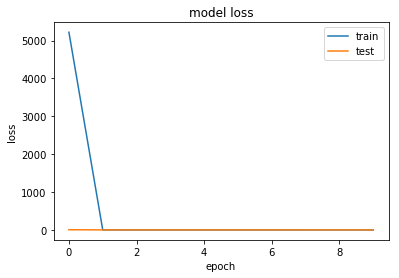

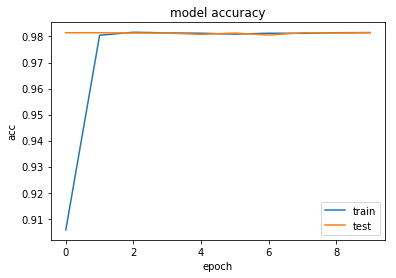

In [278]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

plt.figure()
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()


In [279]:
X_test.shape

(7919, 30)

In [297]:
pred = model.predict_classes(X_test)
pred = np.array(pred)
pred

7808/7919 [============================>.] - ETA: 0s

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [309]:
y_test = np.array(y_test[:,0])
y_test

array([ 1.,  1.,  1., ...,  1.,  1.,  1.])

In [303]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, pred))

[[ 147    0]
 [7772    0]]
